## Proyecto Integrador

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Avance 1

Lectura del dataset (archivo csv)

In [2]:
# se agraga el argumento sep aunque en este caso no es nesesario ya que la separacion por coma es la establecida por defecto
data = pd.read_csv("data_latinoamerica.csv", sep= ",") 

Impresión del dataframe "data"

In [ ]:
# dataframe donde se guardó el archivo csv
data

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

Consulta de cantidad de filas y columnas del dataframe, aunque en el paso anterior pueden observarse estos datos se corroboran con la función .shape()

In [3]:
np.shape(data)

(12216057, 50)

Dado que se debe trabajar solo con una selección de países, se comprueba qué países integran el total del dataframe "data"

In [4]:
data.value_counts("country_name")

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Ecuador                 24775
Venezuela               24775
Guatemala               22793
Uruguay                 19820
Paraguay                18829
Honduras                18829
Cuba                    17838
Nicaragua               17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

Se realiza un filtro para obtener sólo los datos referidos a los países seleccionados para el análisis

In [5]:
paises_seleccionados = ["Argentina", "Brazil", "Mexico", "Peru", "Colombia", "Chile"] # variable con la lista de paises seleccionados
data_latinoamerica = data [data["country_name"].isin(paises_seleccionados)] # dataframe donde se guardan los datos filtrados por pais

Consulta de cantidad de filas y columnas de la selección realizada en el paso anterior

In [6]:
np.shape(data_latinoamerica)

(11970289, 50)

Se verifica la calidad de los datos con la funcion .isnull() y se aplica una máscara para obtener las columnas cuyos valores nulos superen los 4000000 (aproximadamente un 30% sobre el total de los datos)   

In [7]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() >4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Se realiza un análisis de los datos obtenidos donde se observa que en varias columnas hay una gran cantidad de datos nulos, por lo tanto se decide realizar un nuevo filtro. En este caso, el filtro se realiza en el dataframe "data_latinoamericana", utilizando la columna "location_key" para tal fin.

In [8]:
# se guardan los datos filtrados en un nuevo dataframe
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica["location_key"].isin(["AR", "CL", "CO", "MX", "PE", "BR"])]

Se realiza un filtro, a través de una máscara, seleccionando para el análisis solicitado las fechas mayores al 1 de Enero de 2021.

In [9]:
# nuevo dataframe  con los datos filtrados por la fecha solicitada
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises["date"] > "2021-01-01"]

Luego de realizados todos los filtros anteriores, se vuelve a verificar la cantidad de valores nulos y vacios existentes. Los valores nulos obtenidos se almacenan en una variable.

In [10]:
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum() > 0] 
print(valores_nulos_fecha) # se imprime la variable donde se guardaron los valores nulos obtenidos del dataframe data_latinoamerica_paises_fecha
print(np.shape(data_latinoamerica_paises_fecha)) # se realiza un conteo de cantidad de registros en el dataframe

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


En base a un análisis detallado realizado sobre cada columna mencionada a continuación de realizó la siguiente operación de relleno donde faltaban valores:

#new_confirmed, new_deceased: los valores faltantes fueron reemplazados por el promedio correspondiente a cada país

#cumulative_confirmed, cumulative_deceased: los valores faltantes fueron reemplazados por el valor anterior dado que ambas columnas contienen valores acumulados.

#cumulative_vaccine_doses_administered: los valores faltantes fueron reemplazados por el valor anterior ya que la mayoría de los datos nulos se observaron sobre el final del rango de fechas analizado. Así mismo, también se reemplazaron unos pocos valores con el posterior porque se encontraban encabezando el rango de fechas

#average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm, relative_humidity:los valores faltantes fueron reemplazados por el promedio correspondiente a cada país

#new_recovered, cumulative_recovered: los valores faltantes representaban mas del 70% de los registros y fueron reemplazados por 0, dado que se observó que de los 994 registros restantes, 662 correspondían a 0.

In [11]:
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_confirmed"] = data_latinoamerica_paises_fecha["new_confirmed"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_confirmed"].mean())) # se utiliza la funcion round para redondear los valores a enteros
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_deceased"] = data_latinoamerica_paises_fecha["new_deceased"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "new_deceased"].mean())) # se utiliza la funcion round para redondear los valores a enteros
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_confirmed"] = data_latinoamerica_paises_fecha["cumulative_confirmed"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_confirmed"].ffill()) # relleno de nulos con el valor anterior
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_deceased"] = data_latinoamerica_paises_fecha["cumulative_deceased"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_deceased"].ffill()) # relleno de nulos con el valor anterior
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_vaccine_doses_administered"].bfill()) # relleno de nulos con el valor anterior 
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "cumulative_vaccine_doses_administered"].ffill()) # relleno de algunos nulos que quedaban sin completar
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"] = data_latinoamerica_paises_fecha["average_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"] = data_latinoamerica_paises_fecha["minimum_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"] = data_latinoamerica_paises_fecha["maximum_temperature_celsius"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"] = data_latinoamerica_paises_fecha["rainfall_mm"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"] = data_latinoamerica_paises_fecha["relative_humidity"].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"].mean())
    

In [ ]:
data_latinoamerica_paises_fecha["new_recovered"].fillna(0, inplace=True) # de 994 registros con datos, 620 son 0
data_latinoamerica_paises_fecha["cumulative_recovered"].fillna(0, inplace=True) # los nulos coinciden con los nulos de new_recovered y con los valores 0

Se vuelve a verificar la cantidad de nulos y se corrobora que ya no hay faltante de registros. 

In [13]:
data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum() > 0] # se observa que ya no hay registros nulos

Series([], dtype: int64)

Se guardaron los datos filtrados en un archivo .csv para trabajar luego con los datos limpios.

In [14]:
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrado.csv", index=False)

Lectura del archivo .csv que contiene los datos filtrados, guardado anteriormente.

In [2]:
data_filtrada=pd.read_csv("DatosFinalesFiltrado.csv", sep=",")

Se realiza mediante bucle for, la impresión de todas las columnas con su respectiva información general.

Mediante esta descripción general de las columnas se pueden observar distintas métricas que brindan una informacion preliminar de los datos que se poseen, pudiendo encontrar informacion de los valores mínimos que ayudan a descubrir errores en los datos. Además de contar con el número de valores únicos y la cantidad total de registros en el dataframe colaborando con el control final de la calidad de la información. Se distingue diferente información entre las columnas con datos de tipo str, object y las columnas con datos de tipo númericos, como por ejemplo las medidas de estadística decriptiva (tendencia central, no central y de dispersión) en éstas últimas.

Se observa en columnas "new_confirmed" y "new_recovered" valores negativos. Luego de realizar un exhaustivo análisis de las mismas, a través de view data, se confirma que se trata de registros pertenecientes a Brasil. 

In [16]:
for columna in data_filtrada.columns:
    print(columna)
    print(data_filtrada[columna].describe())
    print("-----------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
-----------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.

Se realiza mediante bucle while, la impresión de todas las columnas con su respectiva información general. Si bien es la misma información que se obtiene en el paso anterior, se deja como muestra de otra opción factible para la misma consulta.

In [17]:
columna=0
while columna<len(data_filtrada.columns):
    print(data_filtrada.columns[columna])
    print(data_filtrada [data_filtrada.columns[columna]].describe())
    print("--------------------")
    columna+=1


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
--------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceas

Corrección de valores negativos en columnas "new_confirmed" y "new_recovered". 

In [3]:
# Se aplica función lambda para reemplazar cada valor negativo por su valor absoluto
data_filtrada['new_confirmed'] = data_filtrada['new_confirmed'].apply(lambda x: abs(x) if x < 0 else x) 
data_filtrada['new_recovered'] = data_filtrada['new_recovered'].apply(lambda x: abs(x) if x < 0 else x)

Se verifica la ausencia de valores negativos en ambas columnas.

In [4]:
print(data_filtrada["new_confirmed"].describe())
print("------------------")
print(data_filtrada["new_recovered"].describe())

count      3744.000000
mean      13922.214209
std       24219.185909
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------
count      3744.000000
mean       8348.282585
std       23018.471612
min           0.000000
25%           0.000000
50%           0.000000
75%        1903.750000
max      282957.000000
Name: new_recovered, dtype: float64


Se guarda un nuevo archivo .csv con las últimas correcciones. 

In [5]:
data_filtrada.to_csv("DatosFinales.csv", index=False)

In [2]:
# lectura del archivo .csv definitivo
data_final=pd.read_csv("DatosFinales.csv", sep=",")

Se crea una función que calcula la mediana, varianza y rango de una columna en un DataFrame.
 
Parámetros: df (DataFrame): El DataFrame que contiene la columna a analizar. Columna: El nombre de la columna a analizar.
 
Retorna: Un diccionario con las siguientes claves: Mediana: La mediana de la columna, Varianza: La varianza de la columna,Rango: El rango de la columna.

In [3]:
def calcular_medidas_estadisticas(df, columna):
  mediana = df[columna].median()
  varianza = df[columna].var()
  rango = df[columna].max() - df[columna].min()

  return {
      "mediana": mediana,
      "varianza": varianza,
      "rango": rango
  }

Se realiza una prueba para comprobar el correcto funcionamiento de la función.

In [4]:
# prueba de la función
columna_analizada = "new_confirmed"  #nombre de la columna

medidas_estadisticas = calcular_medidas_estadisticas(data_final, columna_analizada)
print(f"Mediana de {columna_analizada}: {medidas_estadisticas['mediana']}")
print(f"Varianza de {columna_analizada}: {medidas_estadisticas['varianza']}")
print(f"Rango de {columna_analizada}: {medidas_estadisticas['rango']}")

Mediana de new_confirmed: 5214.0
Varianza de new_confirmed: 586568966.085013
Rango de new_confirmed: 298408.0


Se crea una función alternativa que describe los datos estadísticos para un dataframe completo con la finalidad de poder realizar comparaciones entre las columnas numéricas.

In [5]:
def describir_datos_estadisticos(df):
  for columna in df.columns:
    if df[columna].dtype == "float64" or df[columna].dtype == "int64":
        print(columna)
        print("Mediana:", df[columna].median())
        print("Varianza:", df[columna].var())
        print("Rango:", df[columna].max() - df[columna].min())
        print("Moda", df[columna].mode()[0]) # se coloca [0] para que solo imprima un valor moda (cuando haya mas de uno)
        print("----------------")

Ejemplo de uso:

In [6]:
describir_datos_estadisticos(data_final)

new_confirmed
Mediana: 5214.0
Varianza: 586568966.085013
Rango: 298408.0
Moda 0.0
----------------
new_deceased
Mediana: 100.5
Varianza: 257292.47863447666
Rango: 11447.0
Moda 0.0
----------------
cumulative_confirmed
Mediana: 3643377.0
Varianza: 64081091330927.14
Rango: 34567862.0
Moda 6304317.0
----------------
cumulative_deceased
Mediana: 139628.5
Varianza: 33487916463.656017
Rango: 685202.0
Moda 141708.0
----------------
cumulative_vaccine_doses_administered
Mediana: 47784908.0
Varianza: 8760377004967806.0
Rango: 347868463.0
Moda 209673612.0
----------------
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
Moda 17574003.0
----------------
population_male
Mediana: 22254165.0
Varianza: 1101239940970119.2
Rango: 95463769.0
Moda 8972014.0
----------------
population_female
Mediana: 23245825.0
Varianza: 1189151109519313.2
Rango: 99521637.0
Moda 8601989.0
----------------
population_rural
Mediana: 8316127.5
Varianza: 101621363271565.23
Rango: 25465983.0
Moda

#### Avance 2

In [40]:
# lectura del archivo final
data_final=pd.read_csv("DatosFinales.csv", sep=",")

In [41]:
# Se ejecuta la variable paises_seleccionados nuevamente para realizar el avance 2
paises_seleccionados = ["Argentina", "Brazil", "Mexico", "Peru", "Colombia", "Chile"] 

In [4]:
# Se ejecuta la función creada en avance 1 para calcular medidas estadísticas
def describir_datos_estadisticos(df):
  for columna in df.columns:
    if df[columna].dtype == "float64" or df[columna].dtype == "int64":
        print(columna)
        print("Mediana:", df[columna].median())
        print("Varianza:", df[columna].var())
        print("Rango:", df[columna].max() - df[columna].min())
        print("Moda", df[columna].mode()[0]) # se coloca [0] para que solo imprima un valor moda (cuando haya mas de uno)
        print("----------------")

In [5]:
# Se vuelve a ejecutar la descripción de los datos estadísticos para avance 2
describir_datos_estadisticos(data_final)

new_confirmed
Mediana: 5214.0
Varianza: 586568966.085013
Rango: 298408.0
Moda 0.0
----------------
new_deceased
Mediana: 100.5
Varianza: 257292.47863447666
Rango: 11447.0
Moda 0.0
----------------
cumulative_confirmed
Mediana: 3643377.0
Varianza: 64081091330927.14
Rango: 34567862.0
Moda 6304317.0
----------------
cumulative_deceased
Mediana: 139628.5
Varianza: 33487916463.656017
Rango: 685202.0
Moda 141708.0
----------------
cumulative_vaccine_doses_administered
Mediana: 47784908.0
Varianza: 8760377004967806.0
Rango: 347868463.0
Moda 209673612.0
----------------
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
Moda 17574003.0
----------------
population_male
Mediana: 22254165.0
Varianza: 1101239940970119.2
Rango: 95463769.0
Moda 8972014.0
----------------
population_female
Mediana: 23245825.0
Varianza: 1189151109519313.2
Rango: 99521637.0
Moda 8601989.0
----------------
population_rural
Mediana: 8316127.5
Varianza: 101621363271565.23
Rango: 25465983.0
Moda

In [42]:
# Se convierte la columna de fechas a datetime y se la establece como índice del dataframe 
# con el fin de poder utilizarla para analizar los datos a través del tiempo (en gráficos junto a la función .resample()).
data_final["date"] = pd.to_datetime(data_final["date"]) 
data_final.set_index("date", inplace=True) # Se establece la columna de fechas como índice del dataframe

Se comienza con un análisis general basado en la correlación de todas las variables numéricas, con el objetivo de detectar alguna relación entre las variables que se pueda tener en cuenta para continuar analizando de forma más profunda.

Se muestran en un mapa de calor solo las variables que tienen mayor correlación, definiendo un valor absoluto mayor a 0.5.

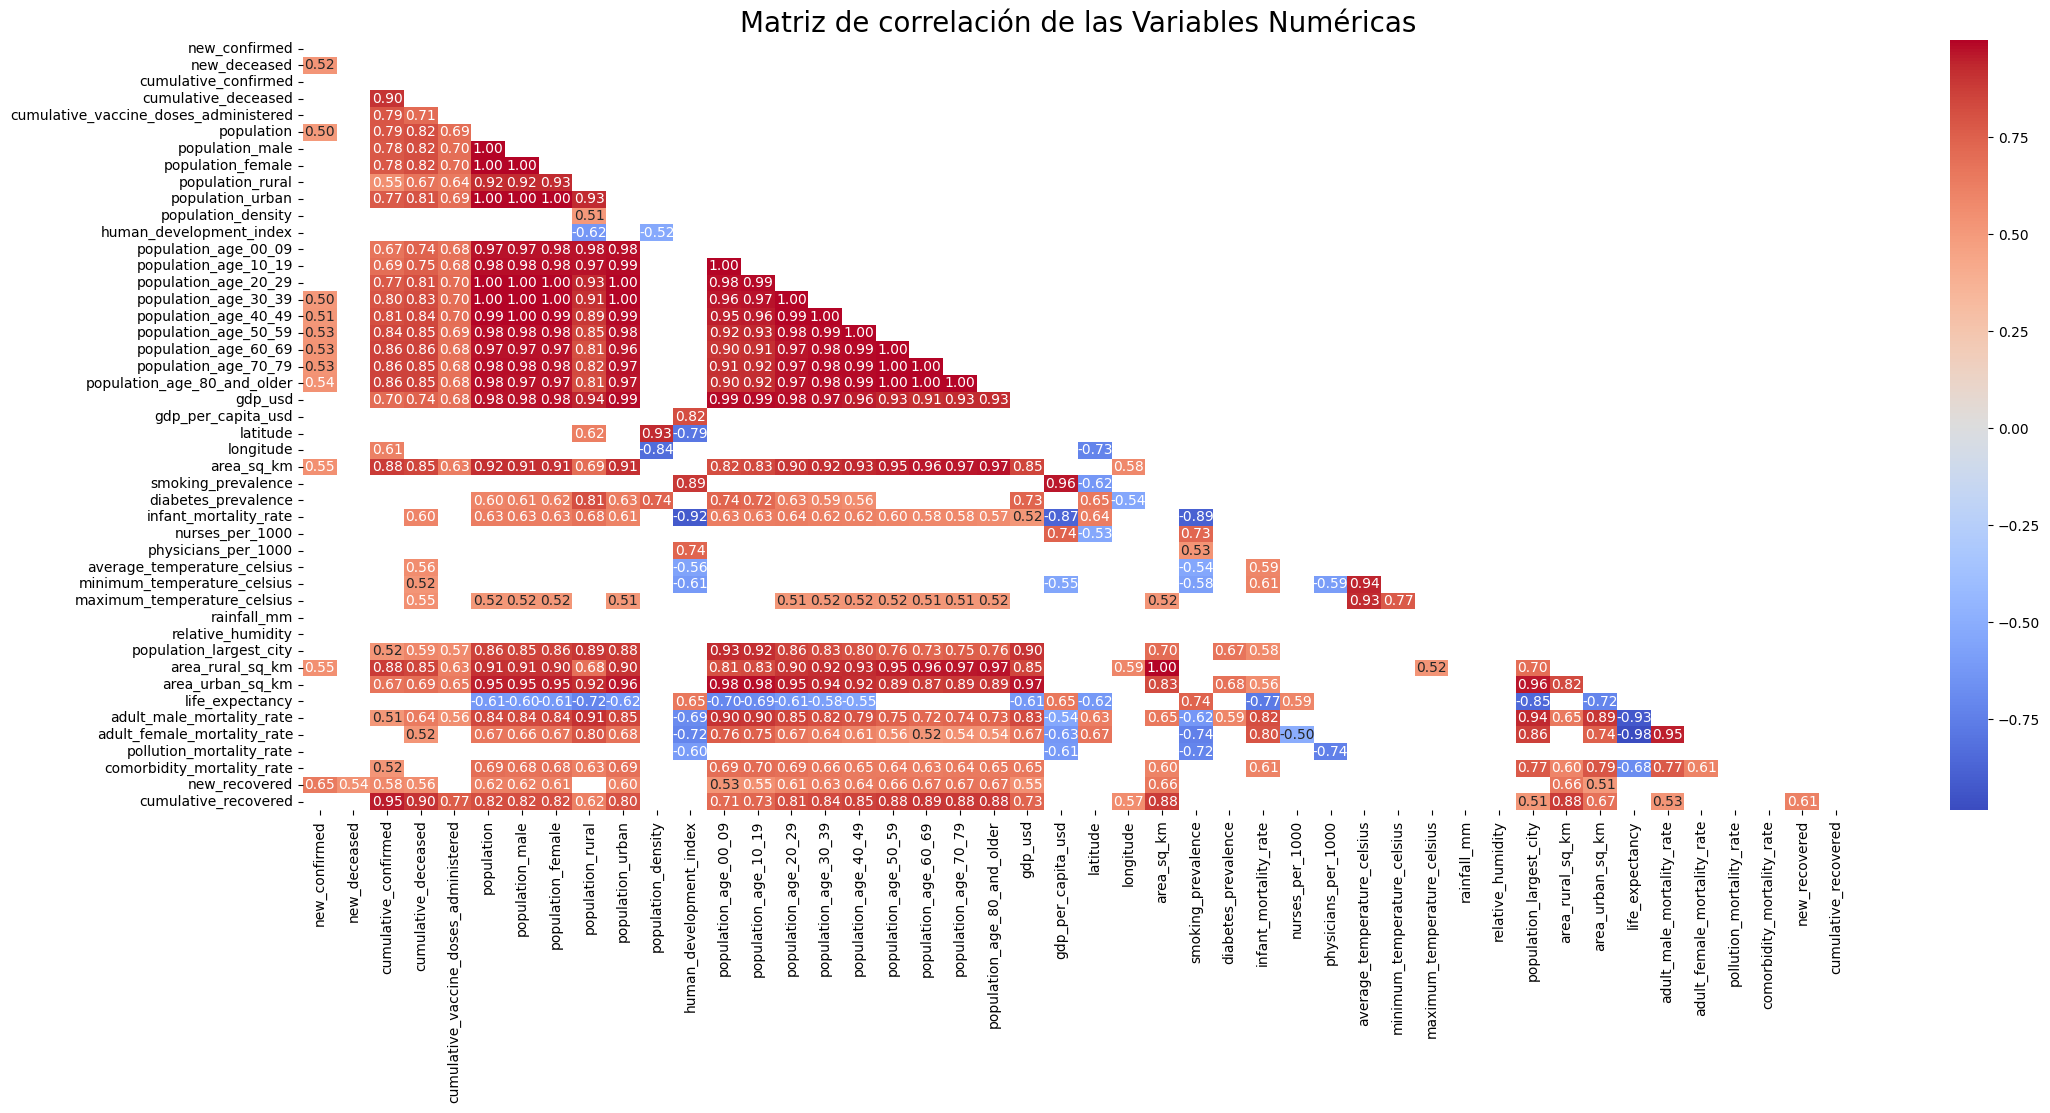

In [7]:
# Se crea matriz de correlación de las variables numéricas
numeric_columns = data_final.select_dtypes(include=["float64", "int64"]).columns
correlacion_matriz = data_final[numeric_columns].corr()

# Se crea máscara para ocultar triángulo superior
mask = np.triu(np.ones_like(correlacion_matriz, dtype=bool))

# Se muestran solo los valores que tienen una fuerte correlación 
# es decir, valores superiores a 0.5, pero como pueden haber valores negativos se utiliza valor absoluto
correlacion_matriz = correlacion_matriz[abs(correlacion_matriz) > abs(0.5)]

# Se crea gráfico: Mapa de Calor
plt.figure(figsize=(25, 10))
sns.heatmap(correlacion_matriz, mask=mask, annot=True, cmap="coolwarm", fmt="0.2f") # se elige mostrar valores, con dos decimales, dentro de las celdas
plt.title("Matriz de correlación de las Variables Numéricas", fontsize=20)
plt.show()


Continuando con el análisis, se decide comparar entre países los valores de las distintas variables.

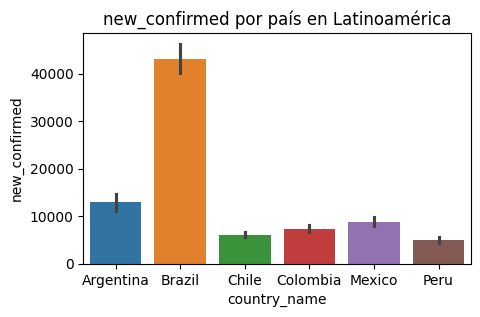

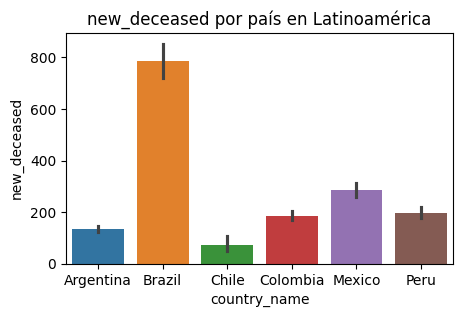

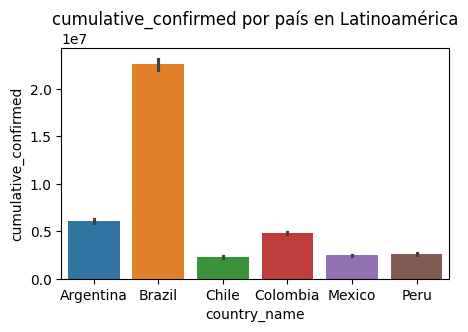

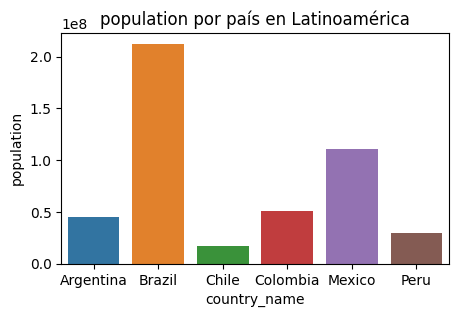

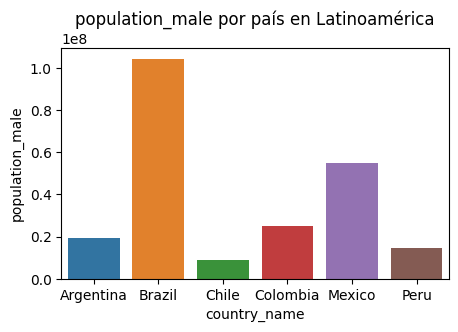

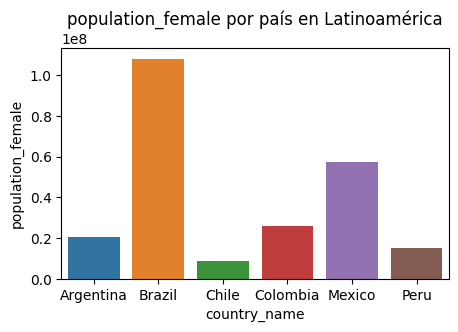

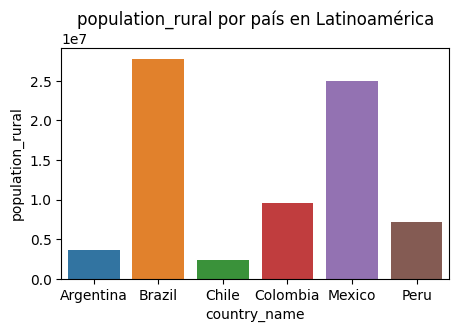

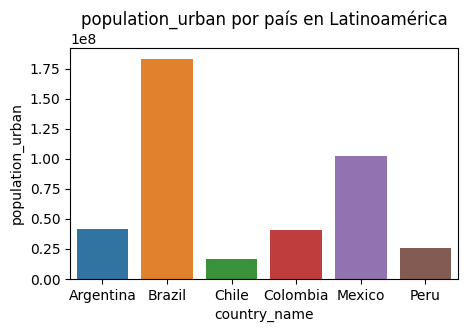

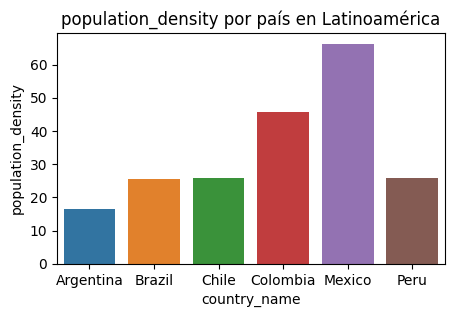

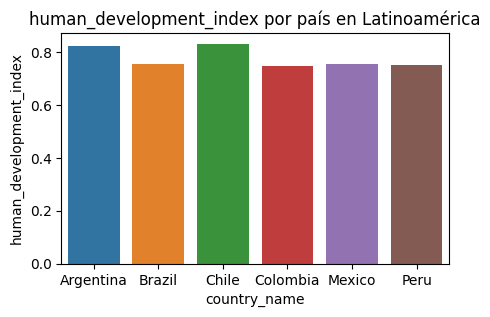

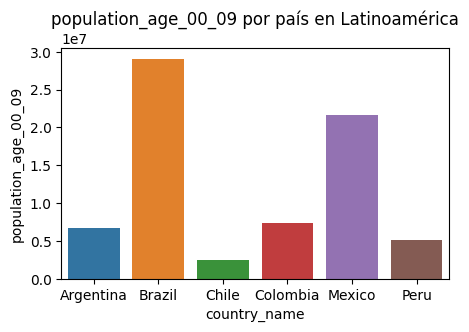

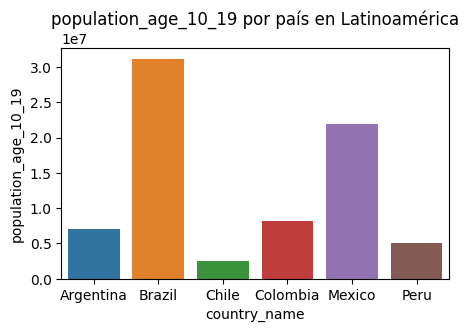

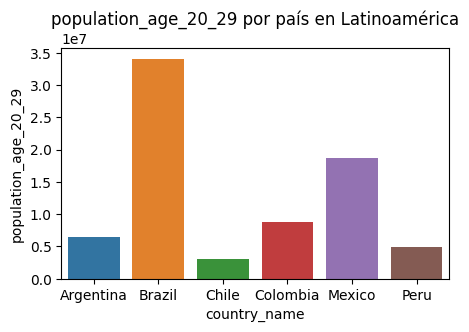

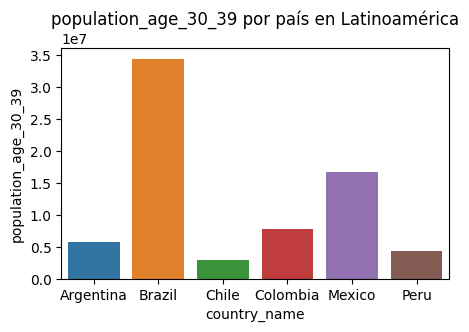

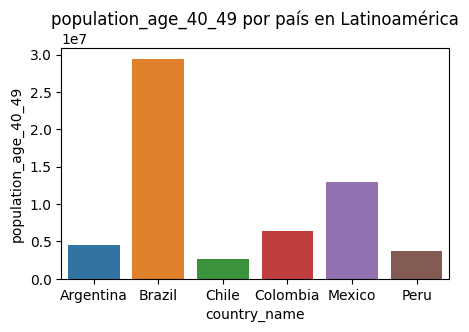

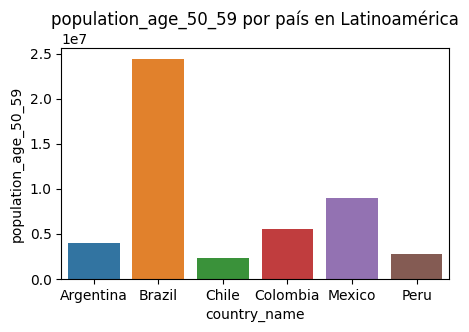

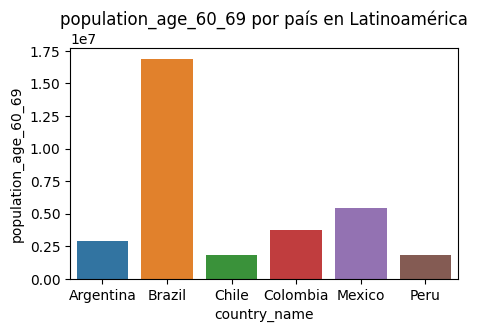

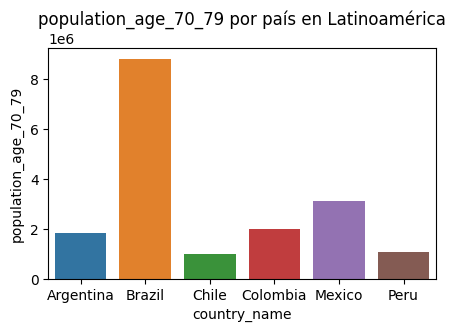

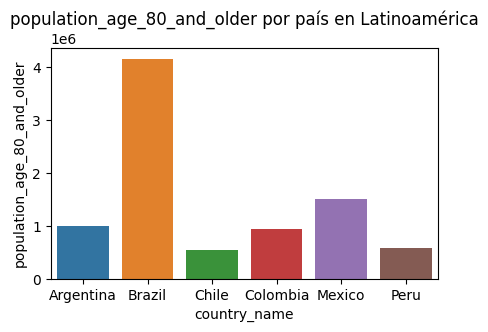

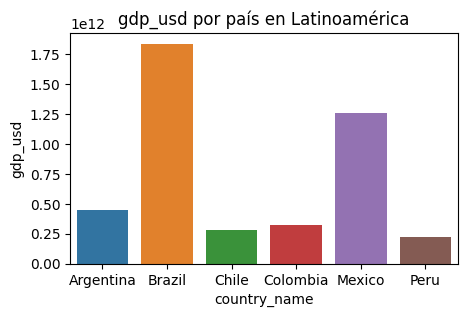

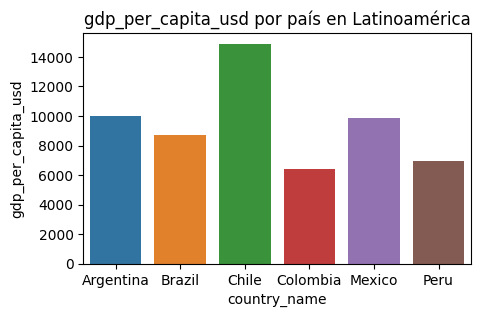

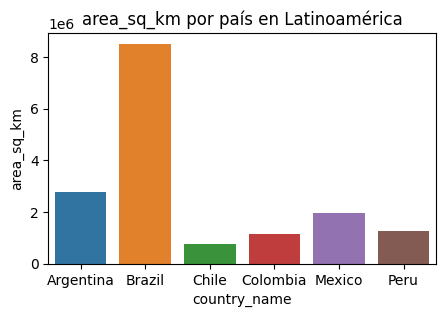

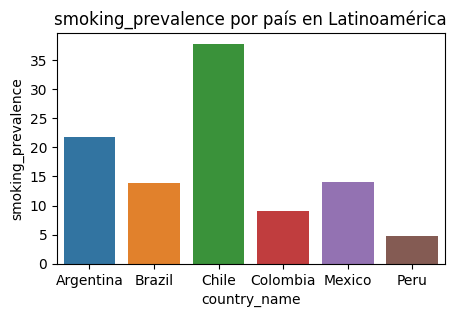

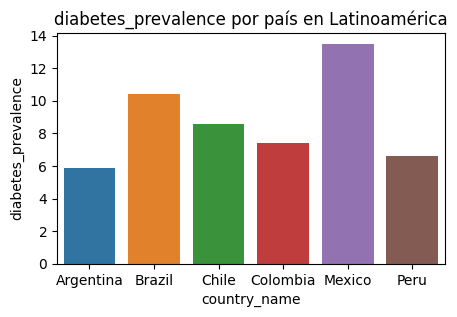

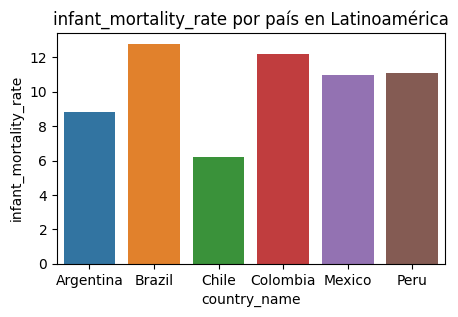

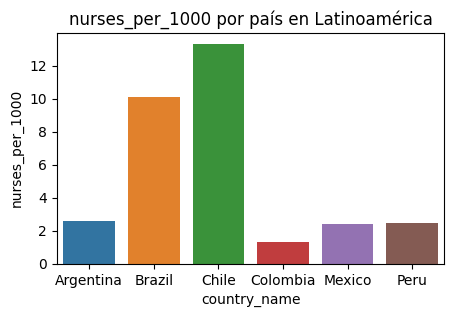

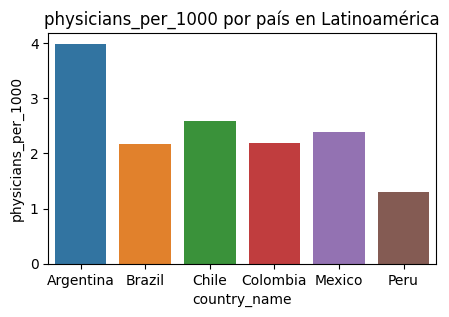

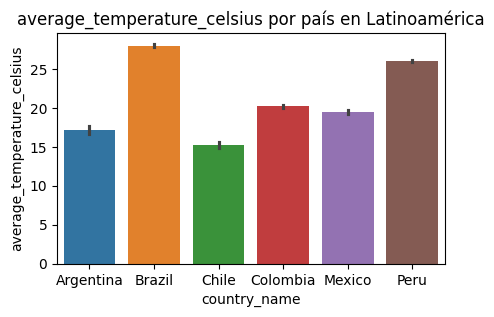

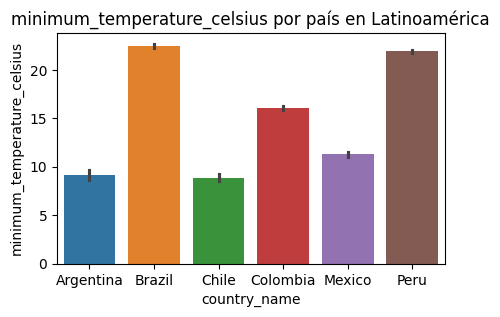

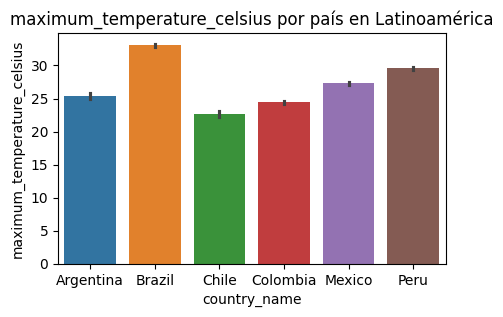

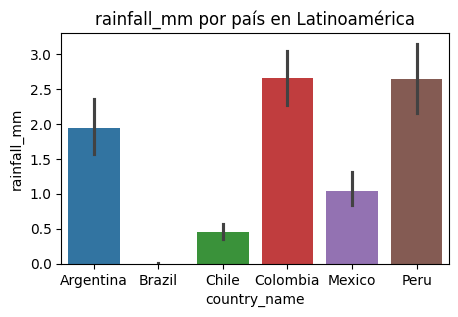

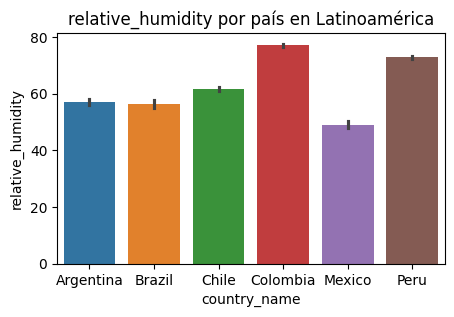

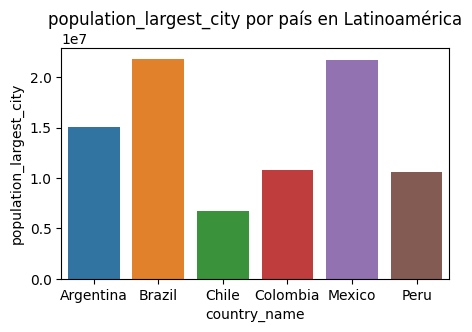

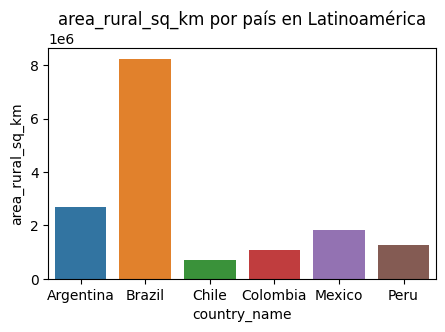

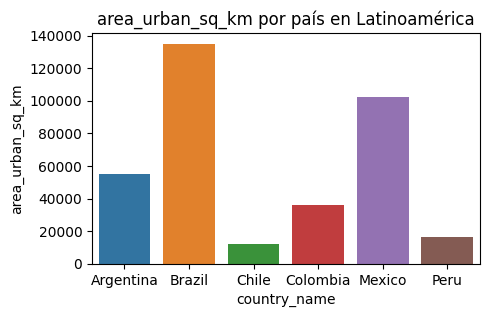

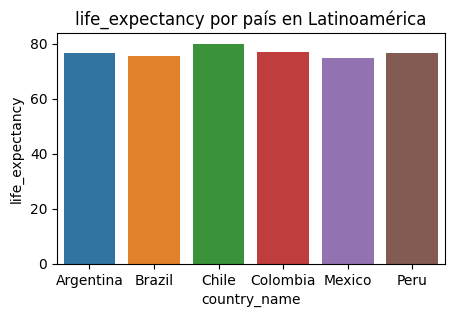

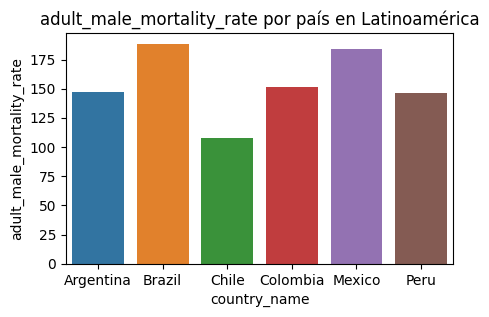

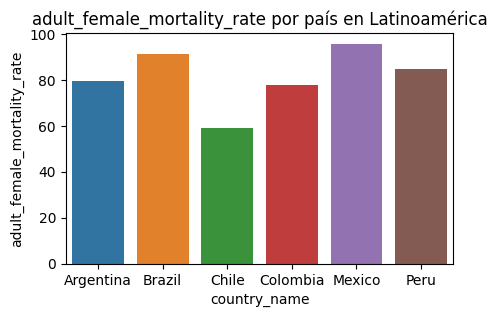

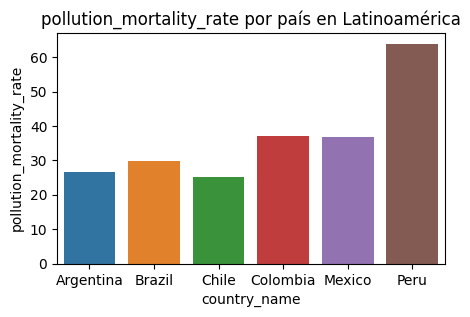

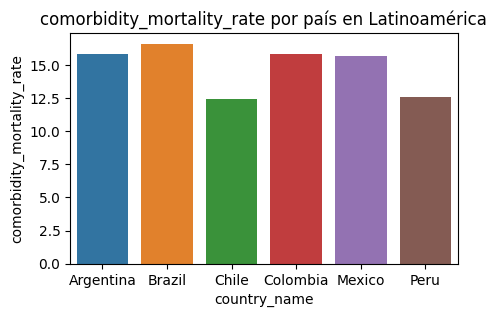

In [8]:
# se realizan gráficos de barras y se utiliza ciclo for para automatizar el proceso de creación dado que son muchas variables a analizar
for i in data_final.columns:
    if i not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_comfirmed", 
        "cumulative_deceased", "cumulative_recovered", "cumulative_vaccine_doses_administered", "new_recovered"]: # se detallan las columnas que no se utilizarán para estos gráficos
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x="country_name", y=i, data=data_final, ax=ax, hue="country_name")
        plt.title(f"{i} por país en Latinoamérica")
        plt.show()

En base a los gráficos anteriores, se observan algunos datos interesantes a tener en cuenta:

Brasil presenta el mayor número de contagios acumulados, en segundo lugar se encuentra Argentina. Brasil también encabeza el ranking de muertes acumuladas por COVID-19, pero en cambio en segundo lugar se encuantra México y Argentina es uno de los países con menor número de fallecidos. 

Que México sea uno de los países con menor número de contagios, a pesar de ser el más densamente poblado, puede deberse a que presenta un número muy alto de ploblación rural en comparación con los demás países analizados.

Con respecto a los datos económicos, se observa que Brasil y México cuentan con el indicador de Producto Bruto Interno a nivel país más alto, mientras que a nivel percápita se suma a éstos, Argentina.

También se puede hacer un análisis preliminar en cuanto a profesionales de la salud, siendo Chile y Brasil los países con más enfermeros cada 100 habitantes (triplicando el número de los demás). En cambio el número de médicos por cada 100 habitantes en Argentina duplica al resto de los países que se mantienen parejos entre ellos.

Por último se observa que Perú tiene una tasa de mortalidad por contaminación que duplica a los demás países.


Se procede a analizar la distribucuón de cada una de las variables que presentan cambios de valores.

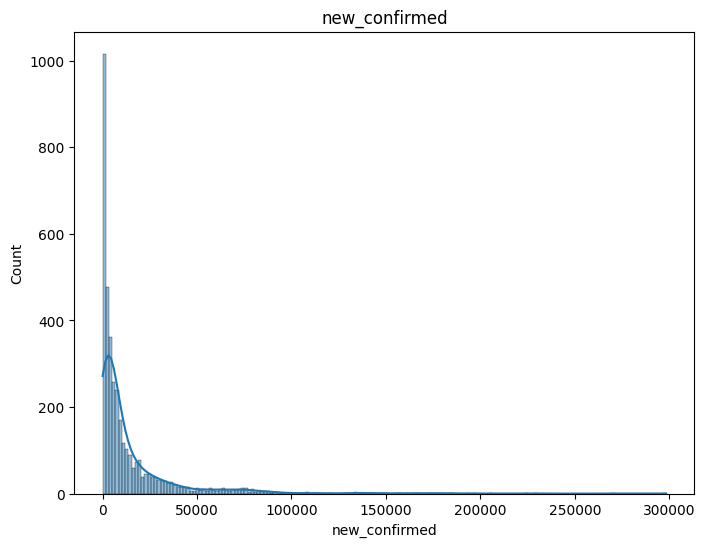

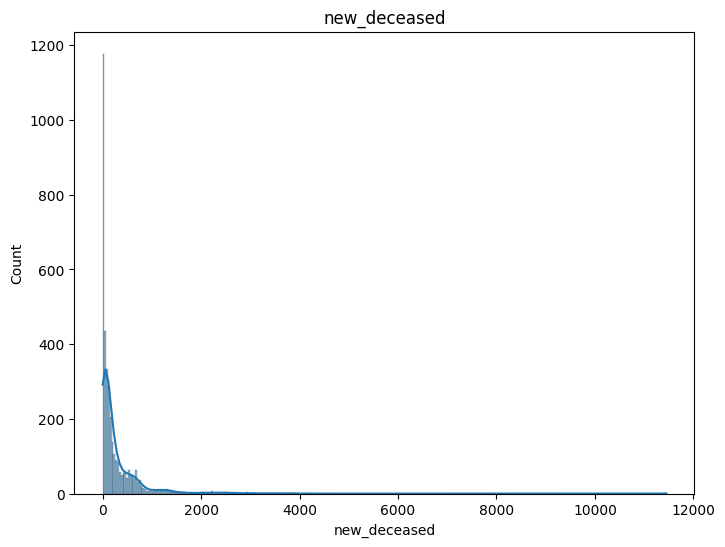

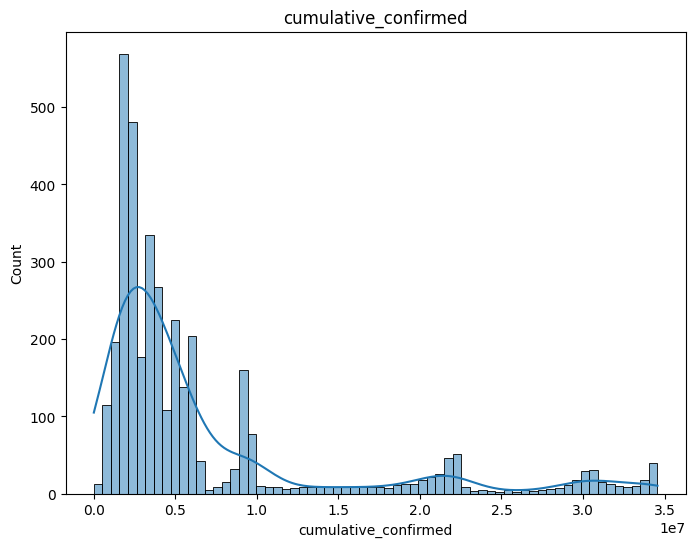

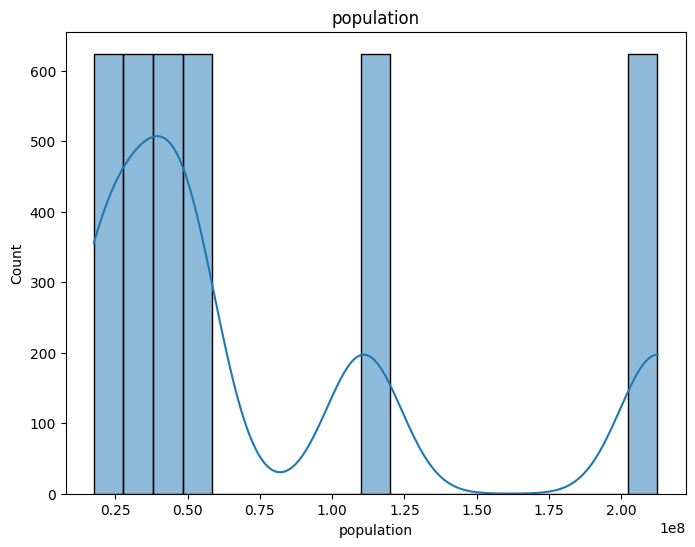

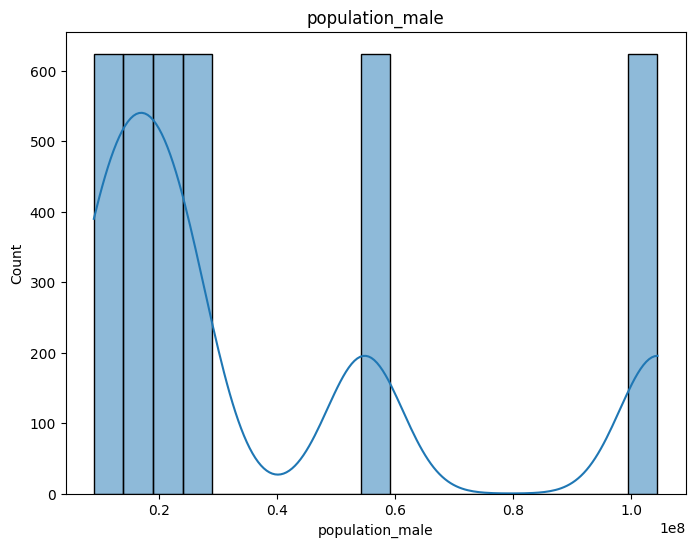

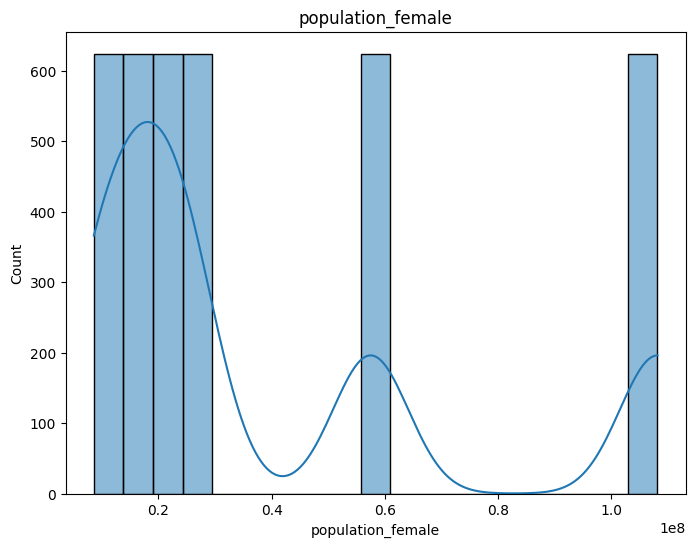

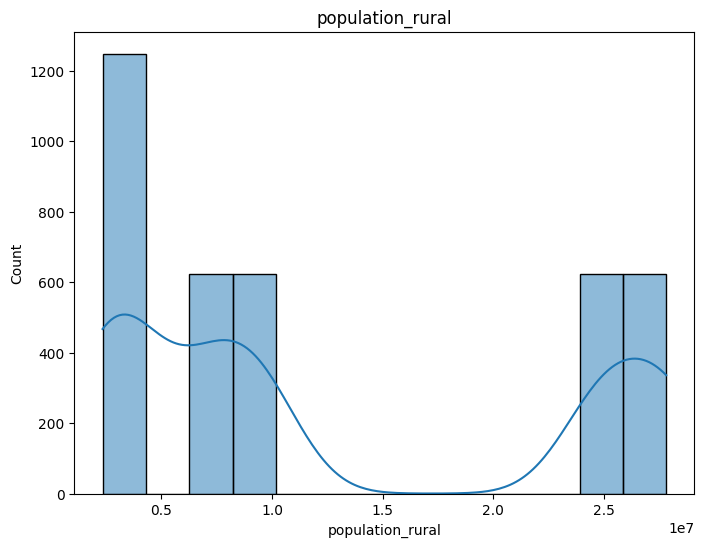

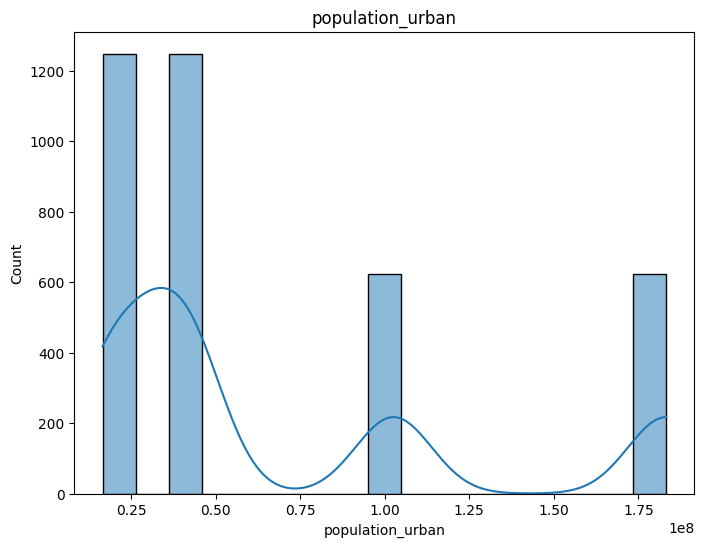

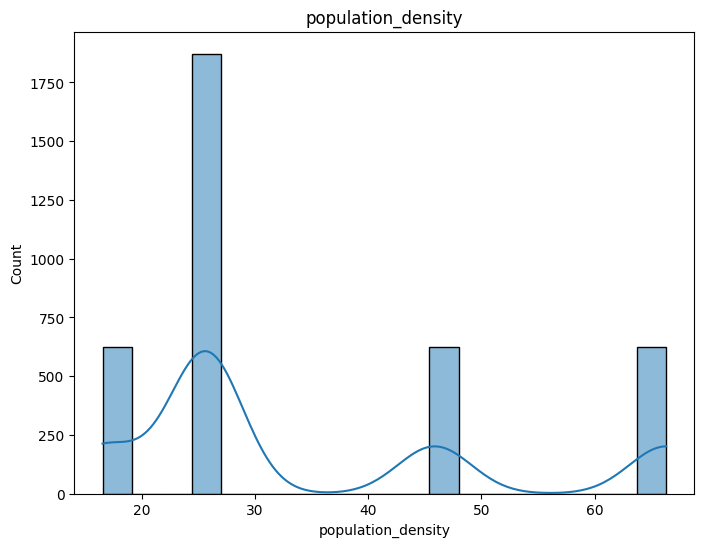

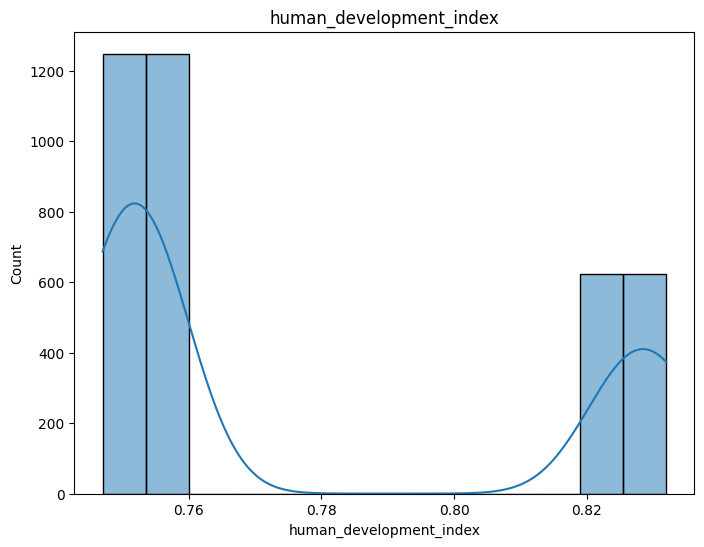

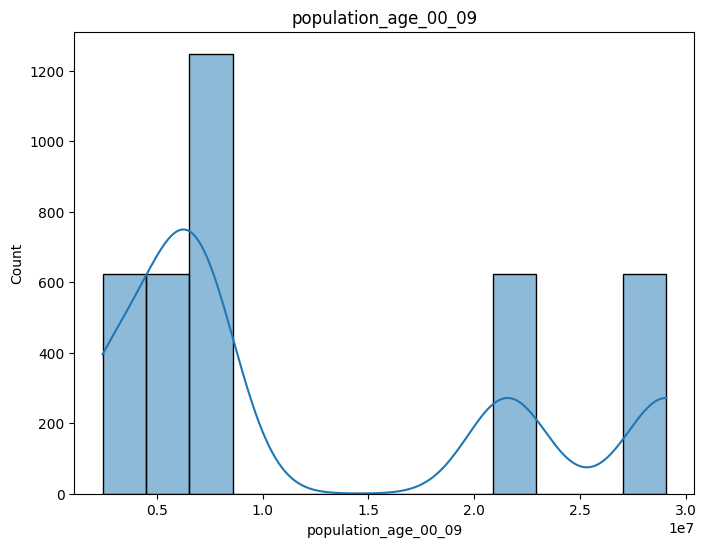

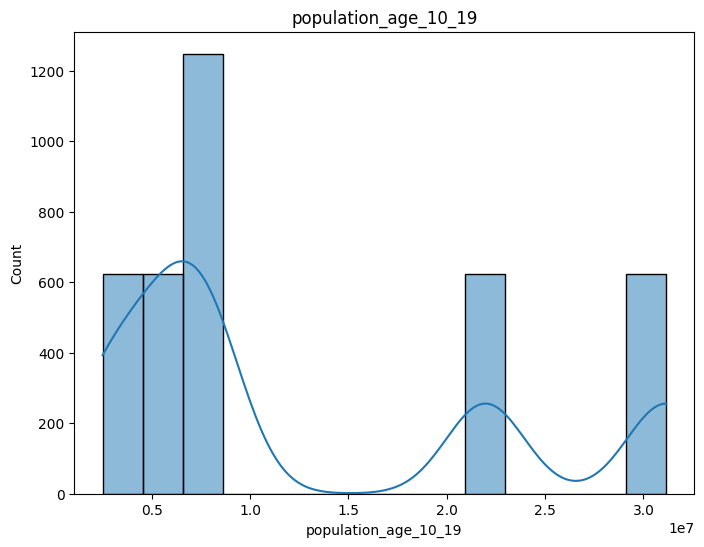

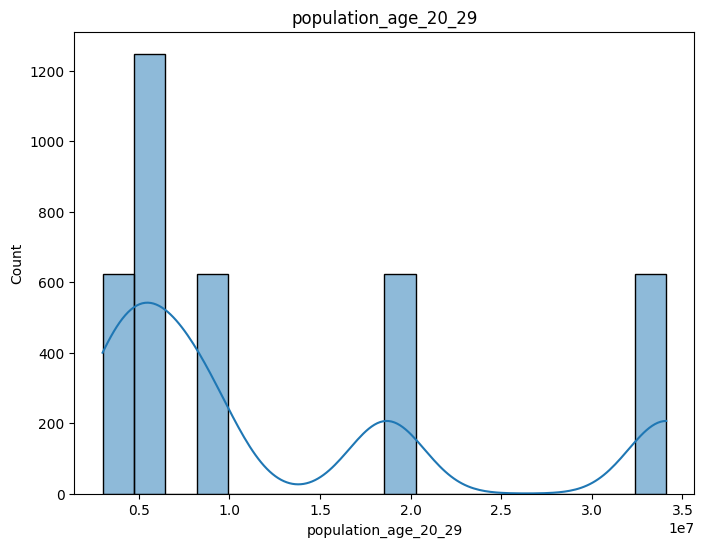

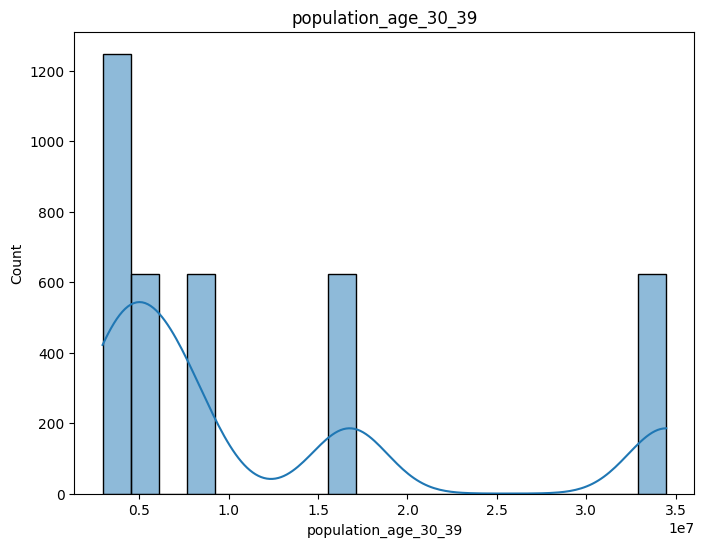

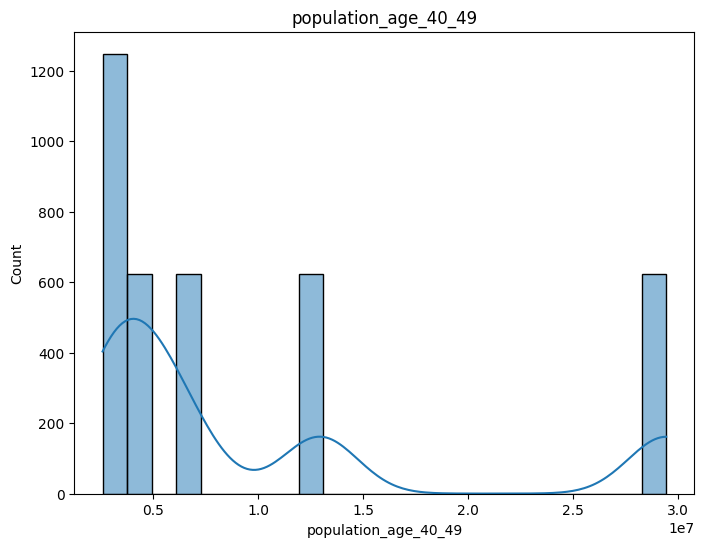

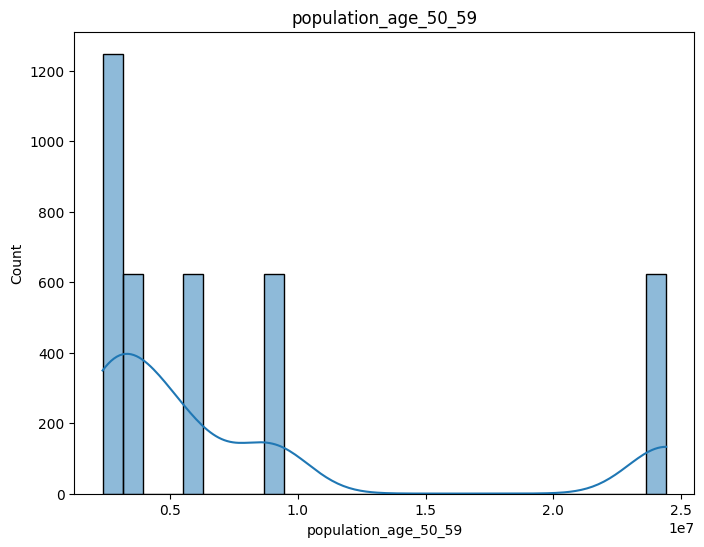

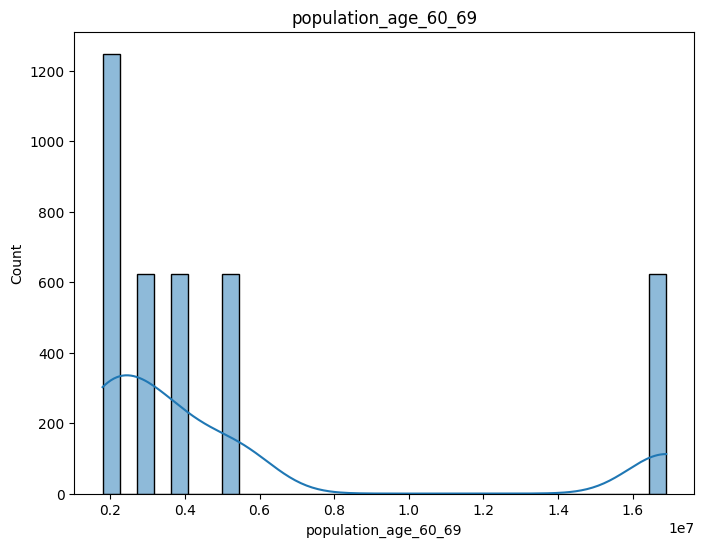

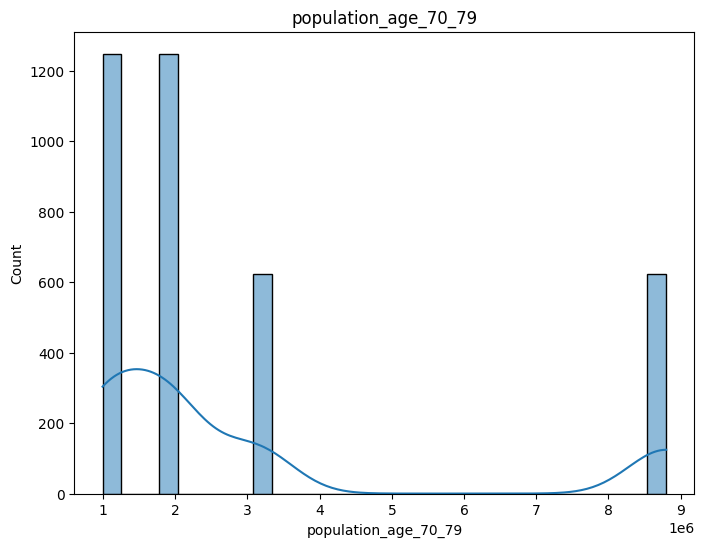

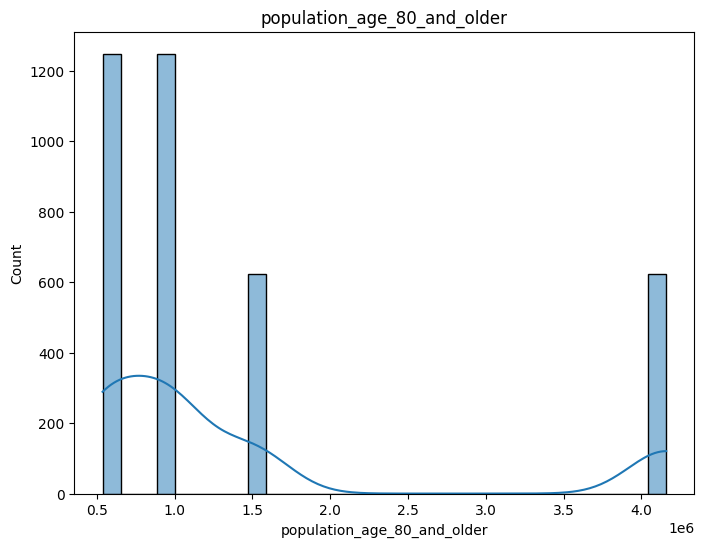

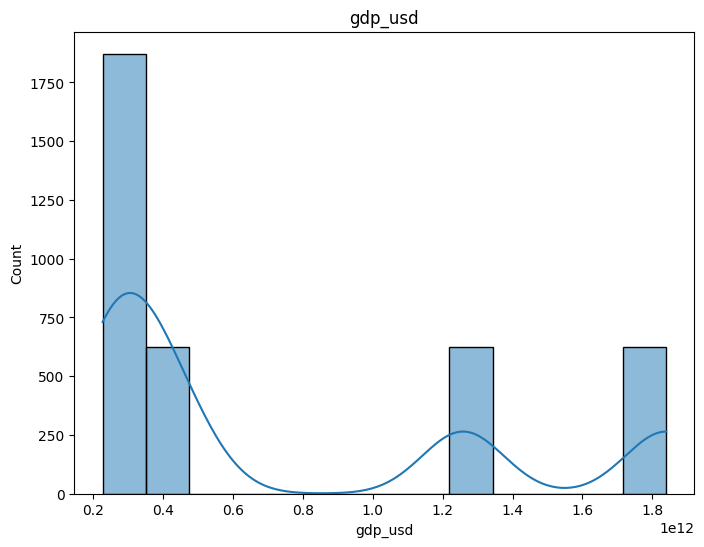

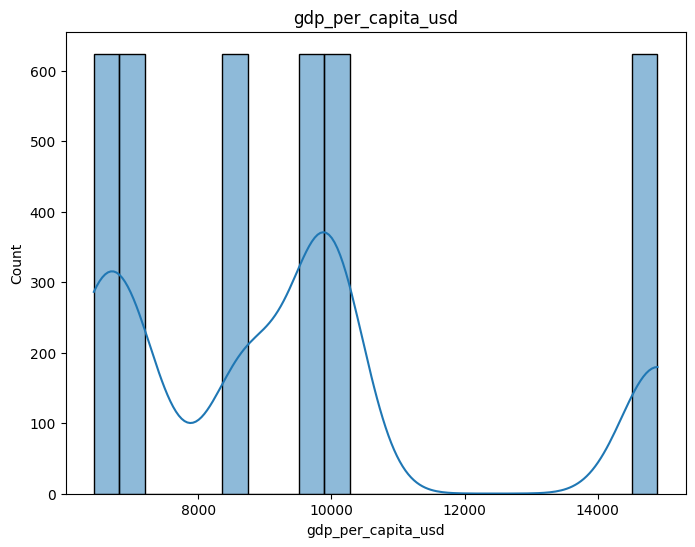

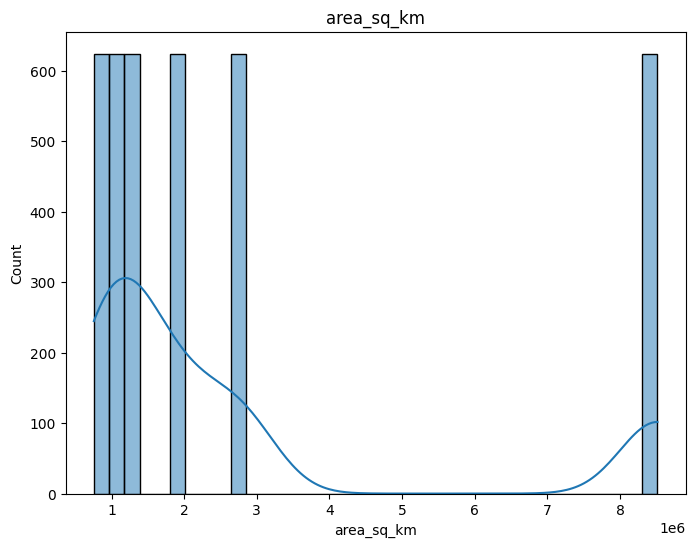

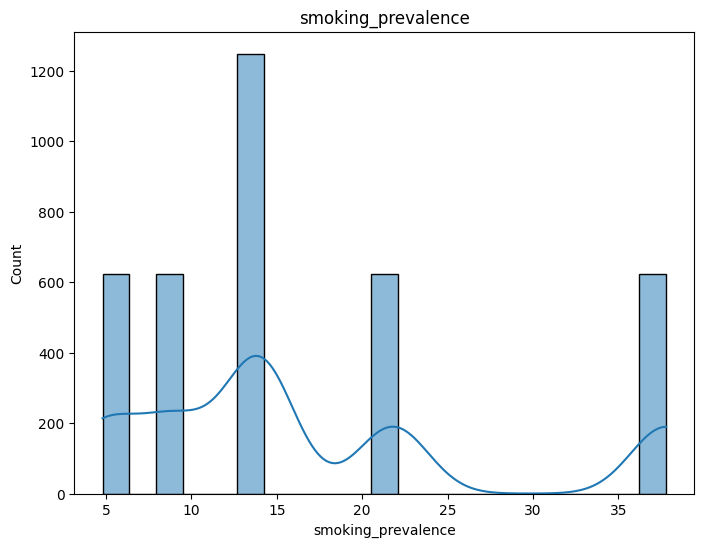

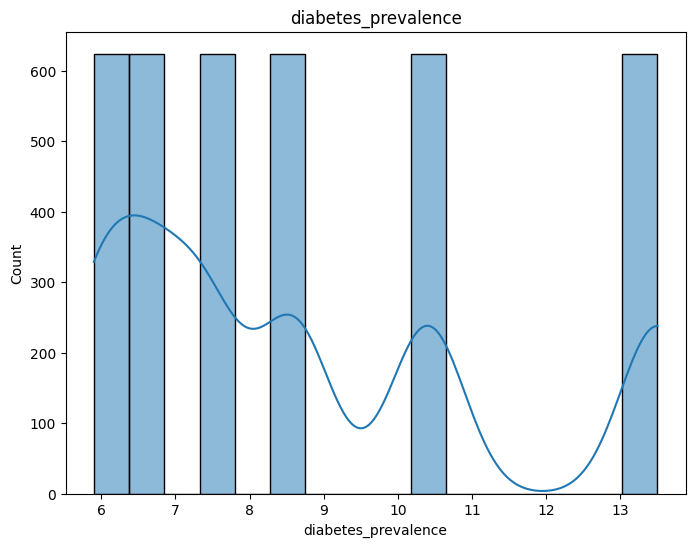

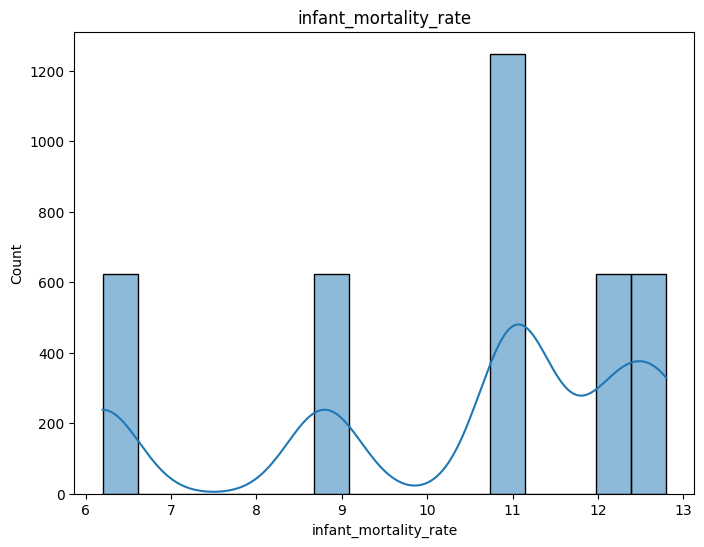

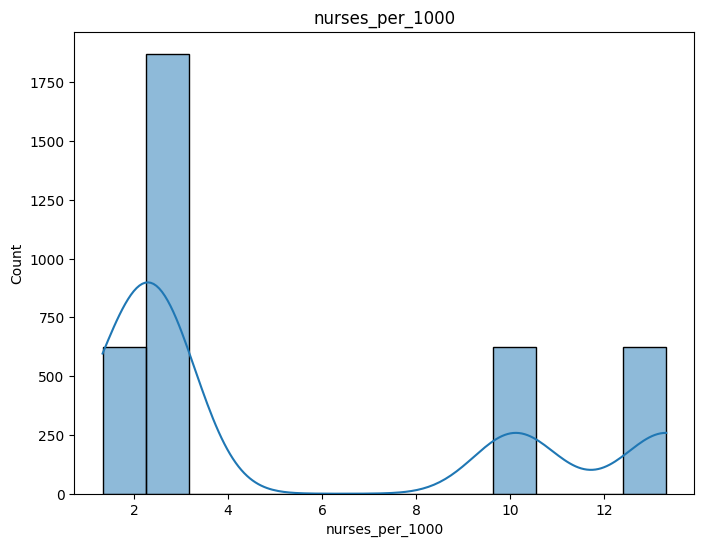

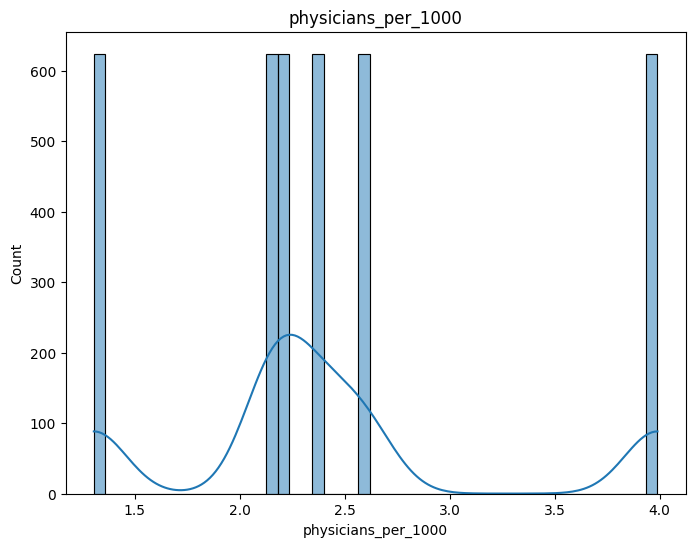

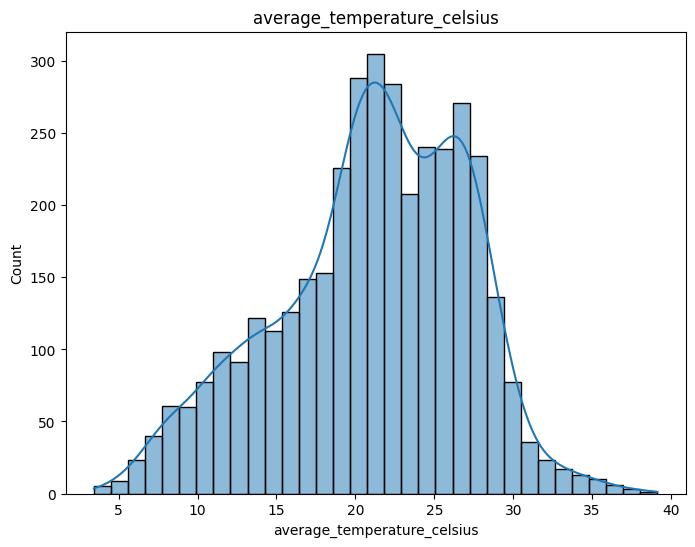

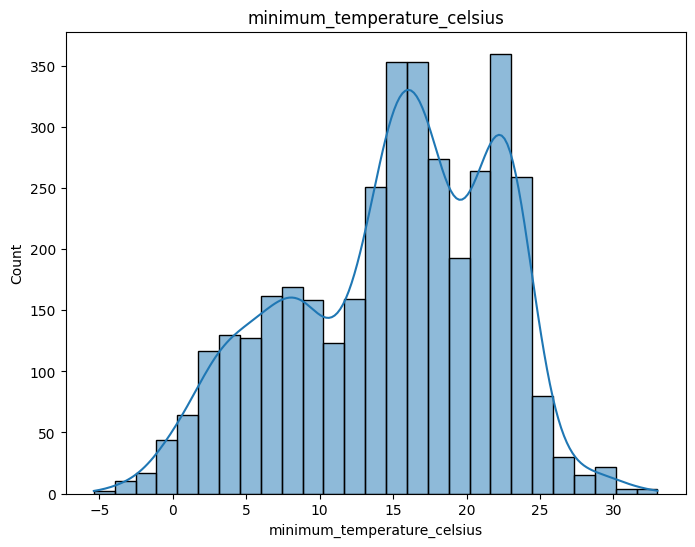

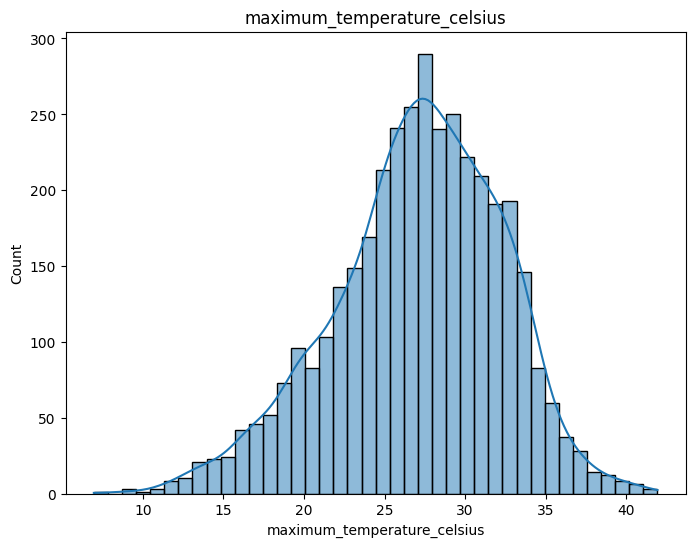

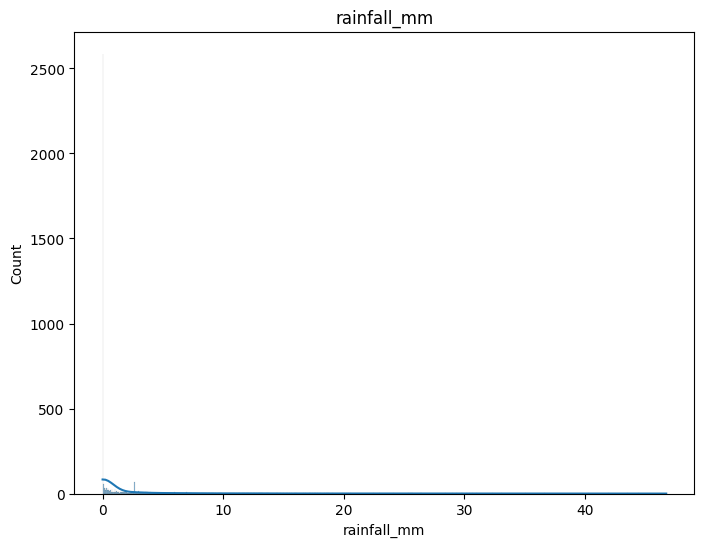

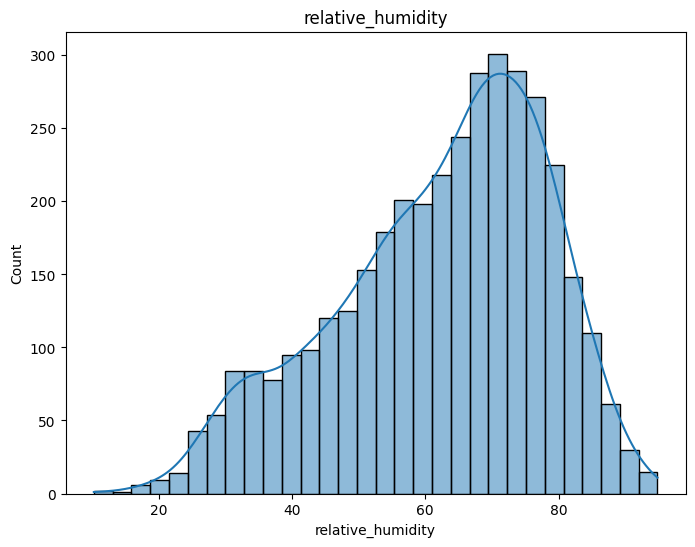

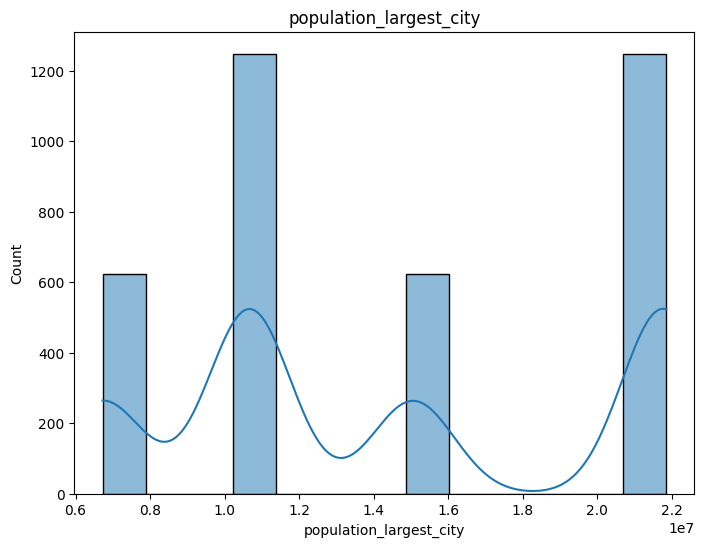

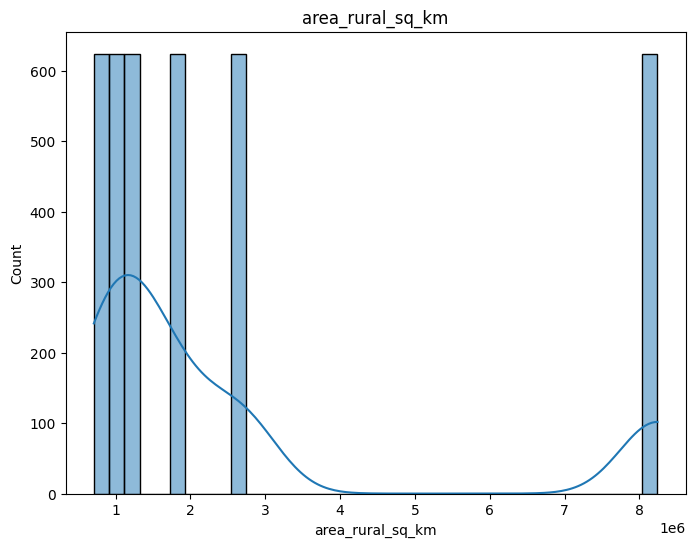

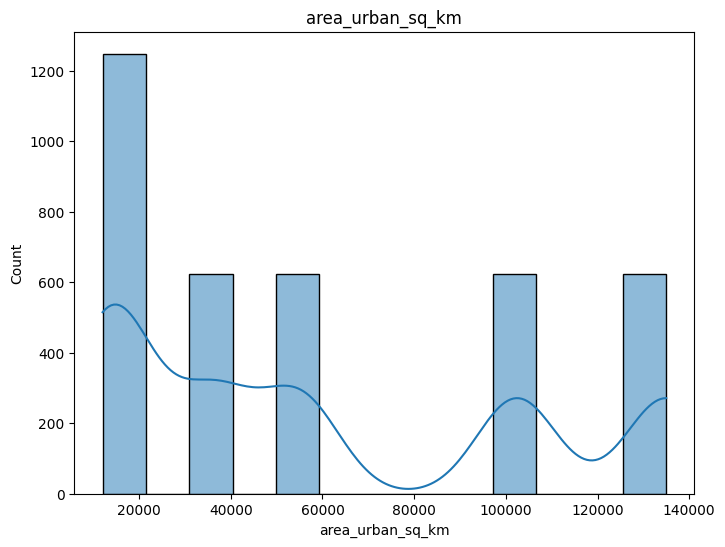

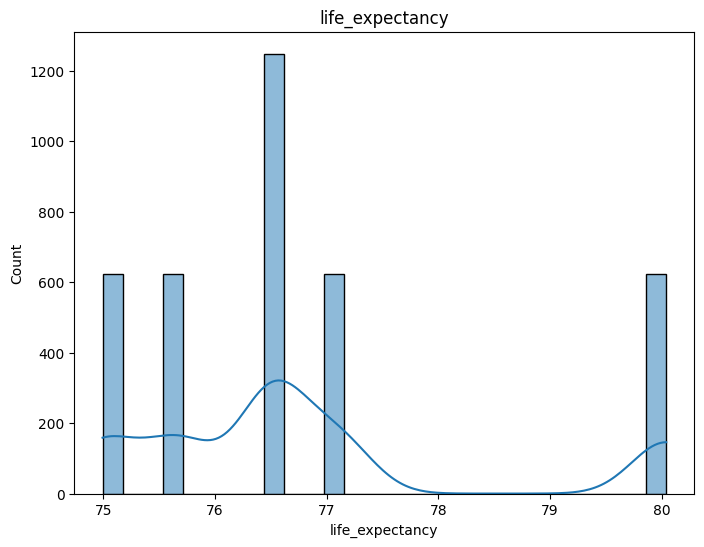

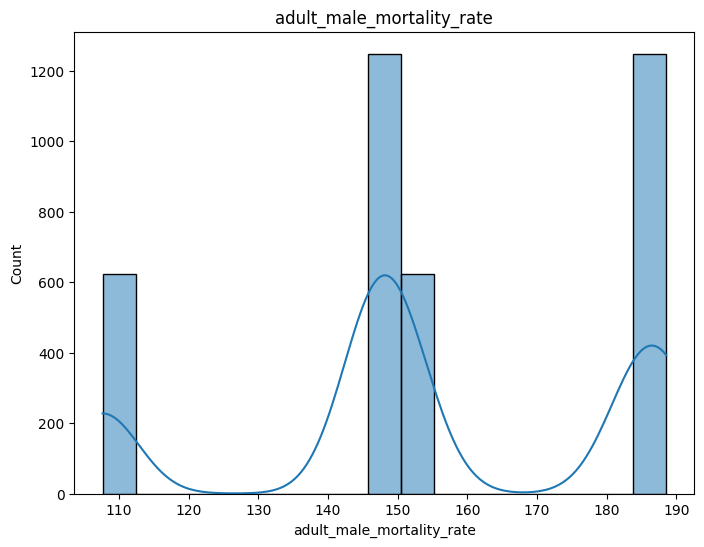

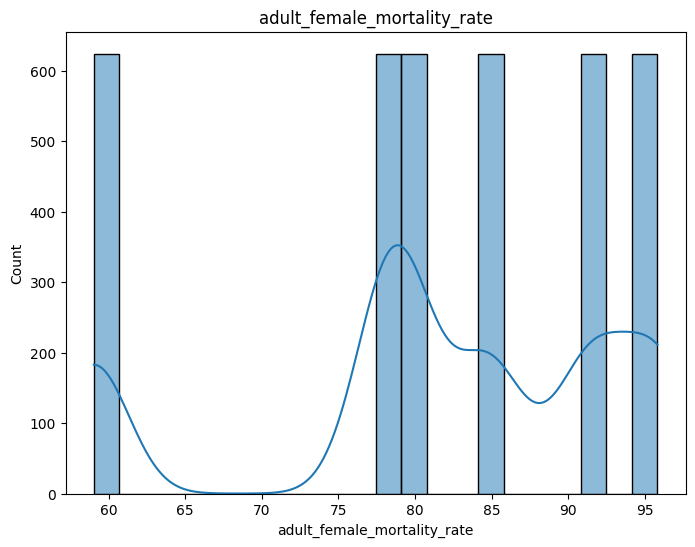

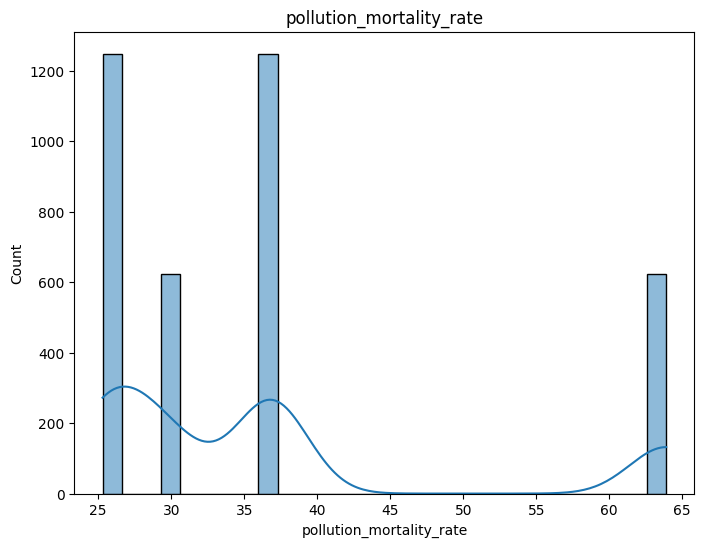

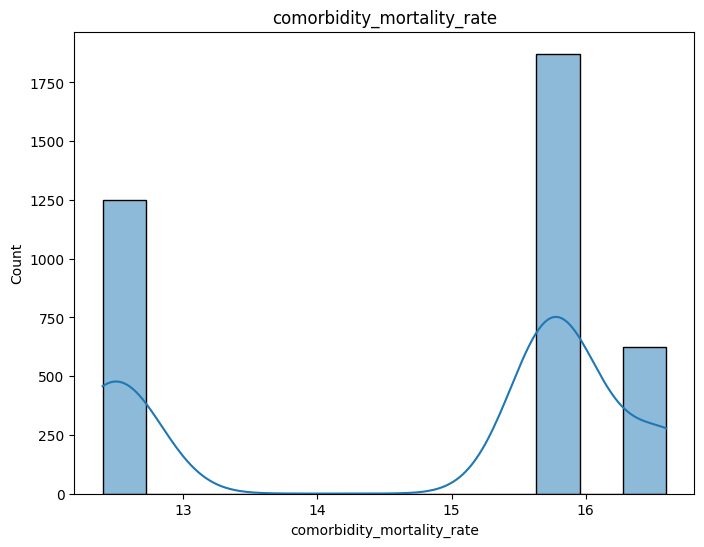

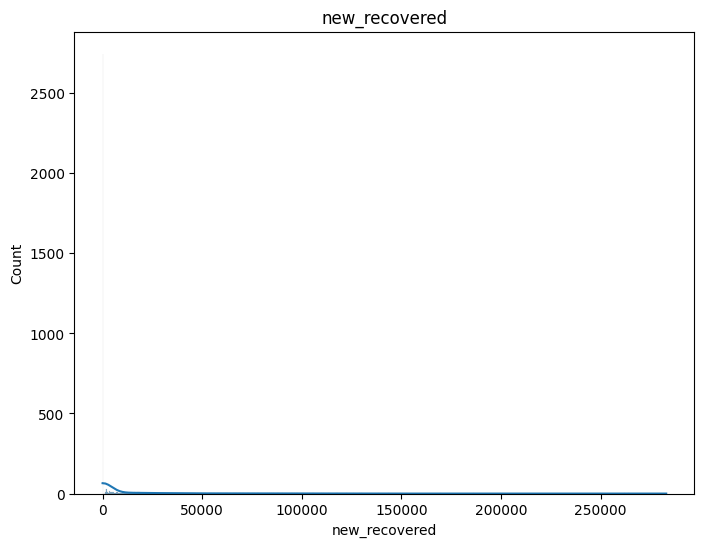

In [9]:
# se realizan histogramas y se utiliza ciclo for para automatizar la creación de los gráficos
for i in data_final.columns:
    if i not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_comfirmed", 
        "cumulative_deceased", "cumulative_recovered", "cumulative_vaccine_doses_administered"]: # se detallan las columnas que no se utilizarán para estos gráficos
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data_final[i], kde=True) # se elige que muestre la densidad kernel (probabilidad)
        plt.title(i)
        plt.show()

Continuando con el análisis del dataframe, se visualiza la distribución de la temperatura media contra los nuevos casos confirmados y los nuevos decesos, en cada país. La finalidad de estas gráficas es intentar comprender el compartamiento de los contagios y las muertes respecto a la temperatura.

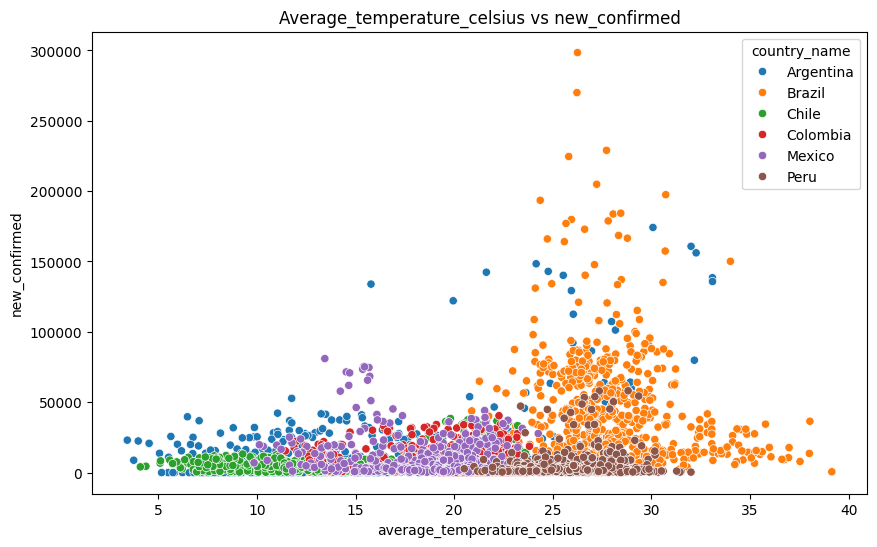

In [10]:
# se realiza diagramas de dispersión
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=data_final, hue="country_name")
plt.title("Average_temperature_celsius vs new_confirmed")
plt.show() 

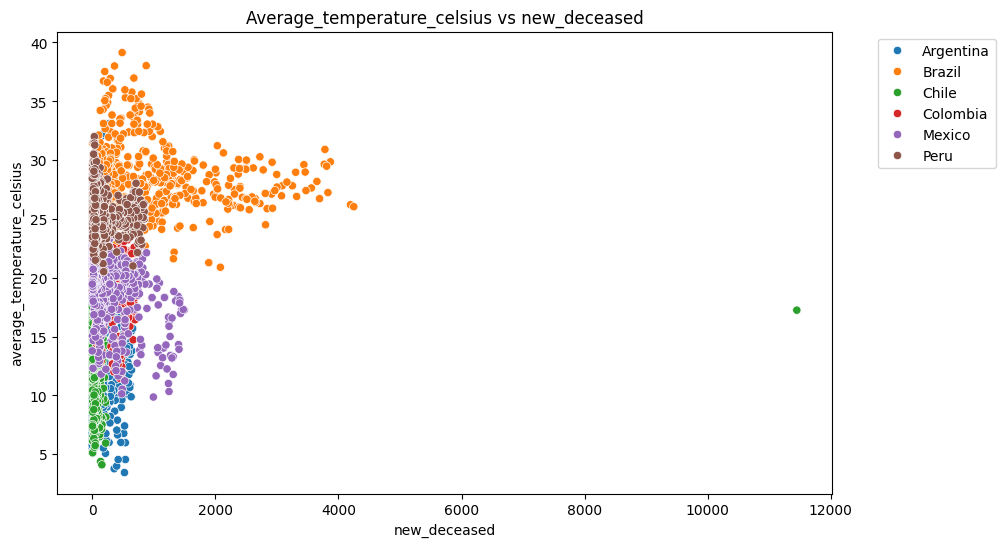

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y="average_temperature_celsius", x="new_deceased", data=data_final, hue="country_name")
plt.title("Average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left") # se colocan las leyendas fuera del gráfico
plt.show() 

Puede verse una mínima tendencia a subir los contagios y las muertes al mismo tiempo que aumenta la temperatura, en Brasil esta relación es un poco más evidente. 


Se decide visualizar el comportamiento de las dosis administradas de todos los países (Valor medio) a lo largo del tiempo.

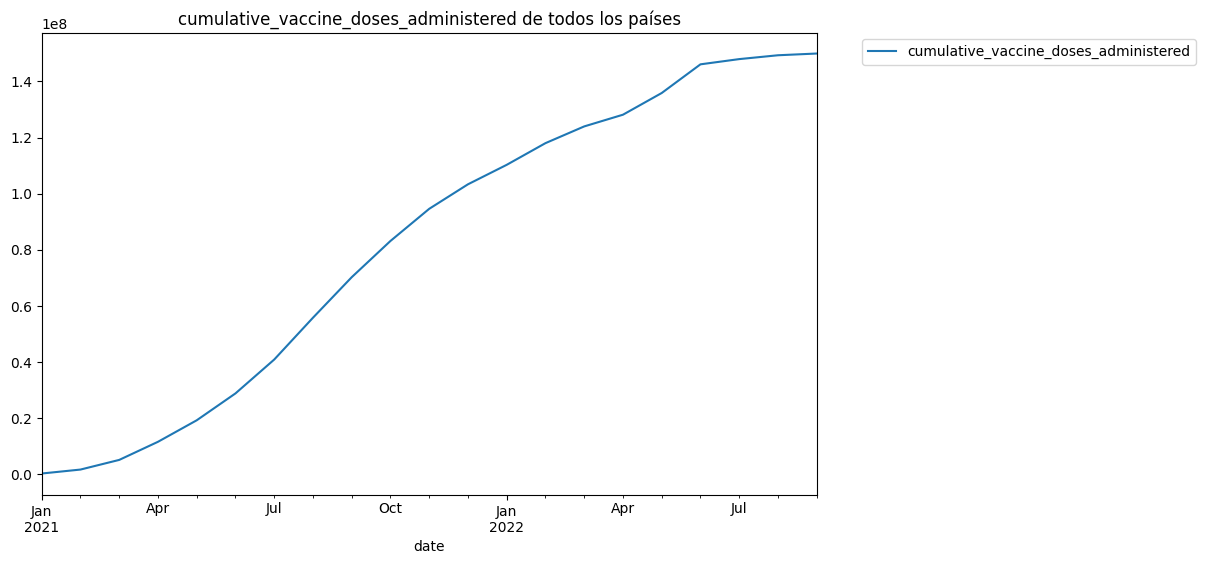

In [12]:
# se realiza gráfico de línea, se usa resample como método de agrupación para poder observar en la gráfica los meses de todos los años.
# con numeric_only nos aseguramos que todos los datos, de la columna, utilizados para la función de agragación sean numéricos
fig, ax = plt.subplots(figsize=(10, 6))
data_final.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot() 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("cumulative_vaccine_doses_administered de todos los países")
plt.show()

Debido a lo general del análisis en el gráfico anterior, se procede a visualizar la evolución de dosis administradas por mes de cada país (Valor medio) a lo largo del tiempo, con el objetivo de poder realizar un análisis más detallado. 

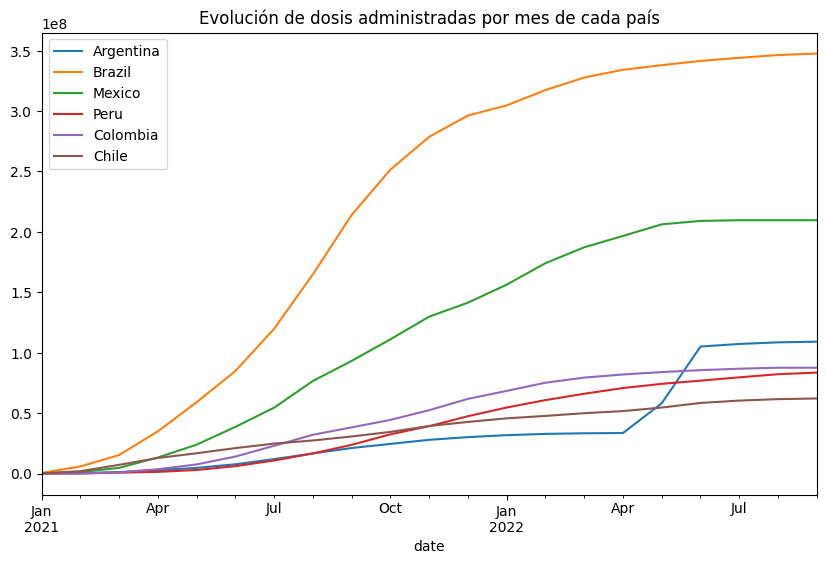

In [13]:
# se realiza gráfico de línea de la evolución para cada país
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"] == pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.title("Evolución de dosis administradas por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

Se aprecia la diferencia notable que tiene Brasil y México de dosis de vacunas aplicadas respecto al resto de los países. Esta información no representa precisamente un mejor manejo de la pandemia, probablemente las diferencias son producto de las distintas cantidades de habitantes por país. Es importante destacar que todos los países fueron aumentando la cantidad de aplicaciones de vacunas.


A continuación se siguen analizando detalladamente diferentes variables. 

Muertes por COVID-19 (valor medio) por mes por país:

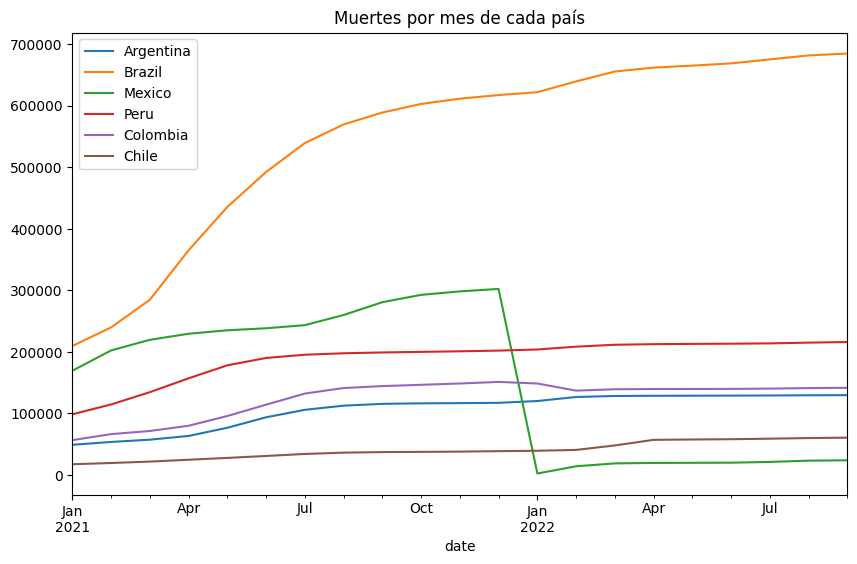

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     data_final[data_final["country_name"] == pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.title("Muertes por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

Se observa que México presenta una fuerte disminución de fallecidos a partir de Enero 2022. Dado que la baja es muy abrupta puede pasar que los datos cargados no estén correctos en su totalidad o que haya faltante de datos en ese período.

Casos de COVID-19 confirmados (valor medio) por mes por país:

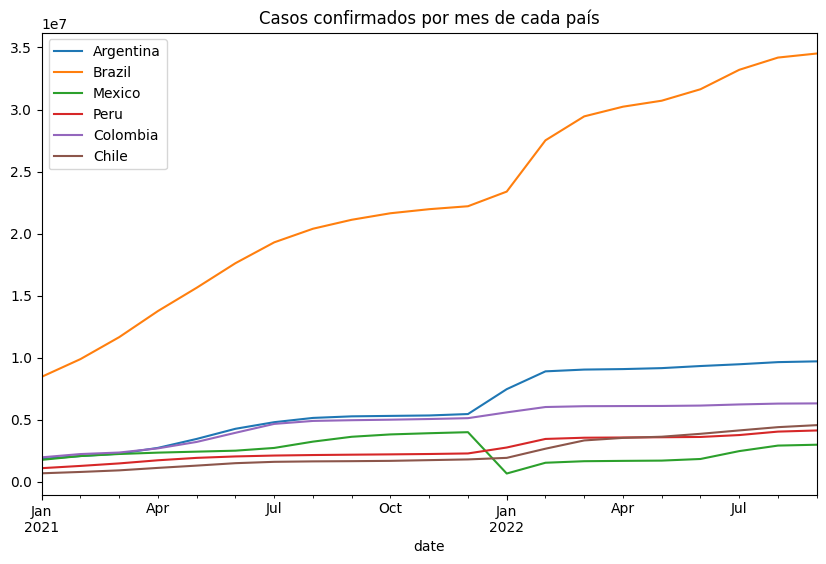

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     data_final[data_final["country_name"] == pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()
plt.title("Casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

Casos de COVID_19 recuperados (valor medio) por mes por país:

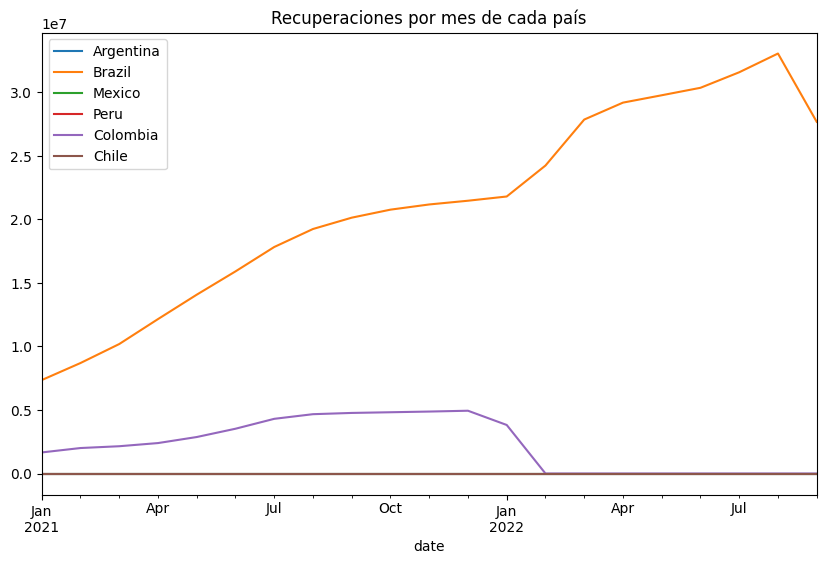

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     data_final[data_final["country_name"] == pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()
plt.title("Recuperaciones por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

En el gráfico anterior solo puede observarse la cantidad de casos recuperados de Colombia y Brasil, debido a faltante de datos en el archivo original.

Comparaciones de nuevos casos (valor medio) entre países:

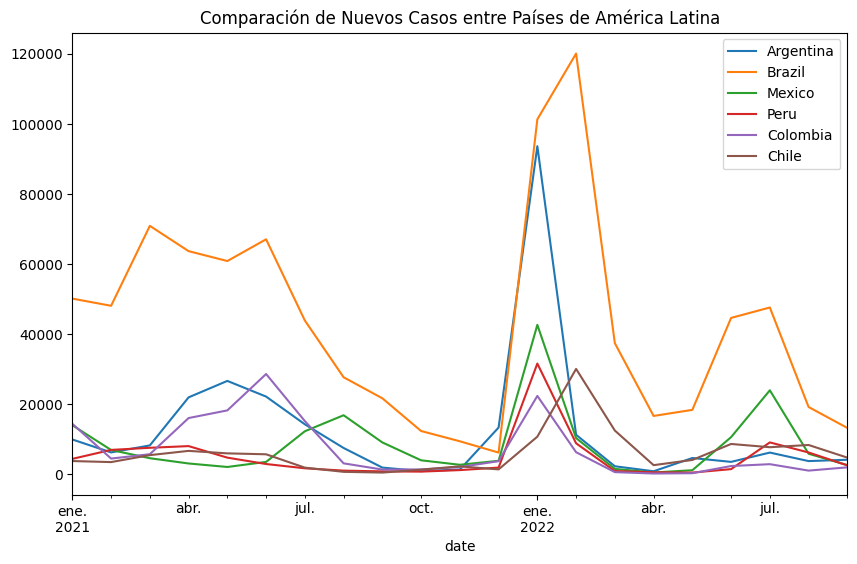

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     data_final[data_final["country_name"] == pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()
plt.title("Comparación de Nuevos Casos entre Países de América Latina")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

En el gráfico anterior queda demostrado que en la mayoría de los países los picos de contagios coinciden con períodos de vacaciones y épocas festivas, donde probablemente la población se reúne con más frecuancia.

Se continúa con un análisis de la distribución de las dosis de vacunas acumuladas por cada país.

Text(0.5, 1.0, 'Distribución de dosis de acumuladas por país')

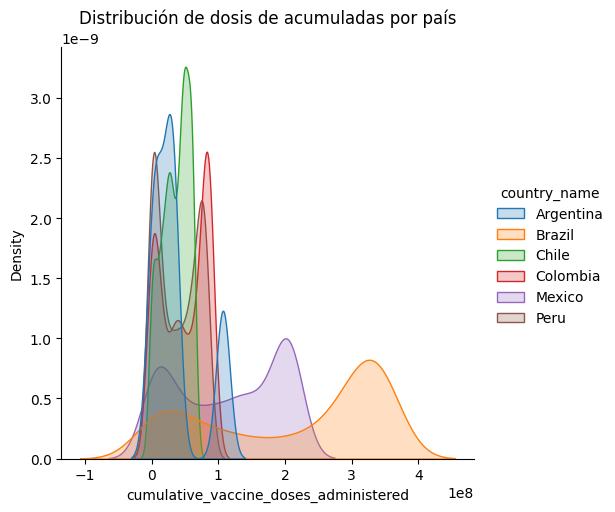

In [18]:
sns.displot(data_final, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True) # se utiliza fill para rellenar con color
plt.title("Distribución de dosis de acumuladas por país")

Se realiza un nuevo gráfico donde se puede observar la relación entre el promedio de temperatura y los nuevos casos confirmados, cuyo fin es ampliar el detalle de análisis.

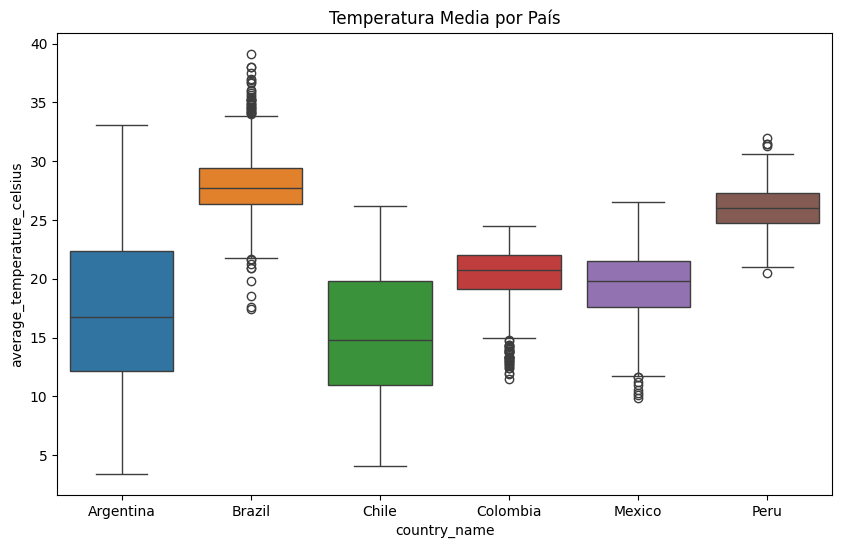

In [19]:
# se crea gráfico de caja: promedio de temperatura vs nuevos confirmados
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_final, hue="country_name")
plt.title("Temperatura Media por País")
plt.show()

Mediante gráficos de violín se analizan las diferentes variables con respecto a cada país.

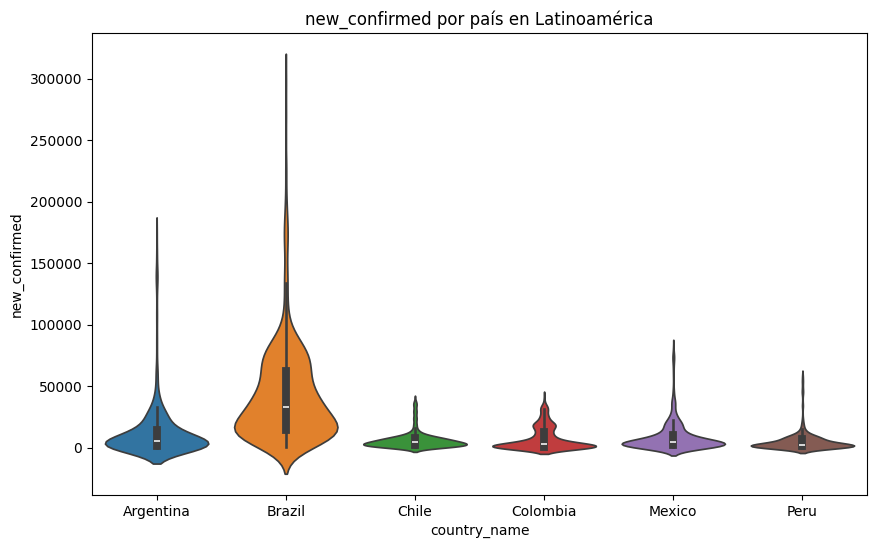

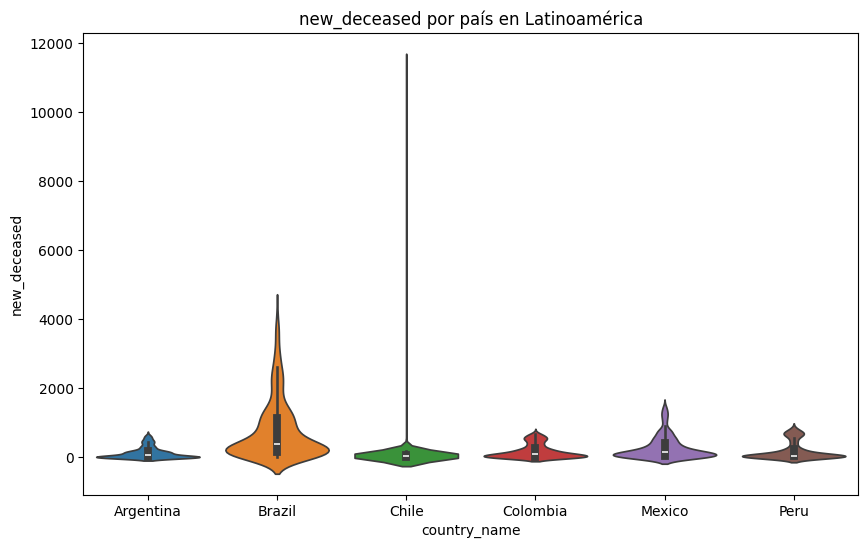

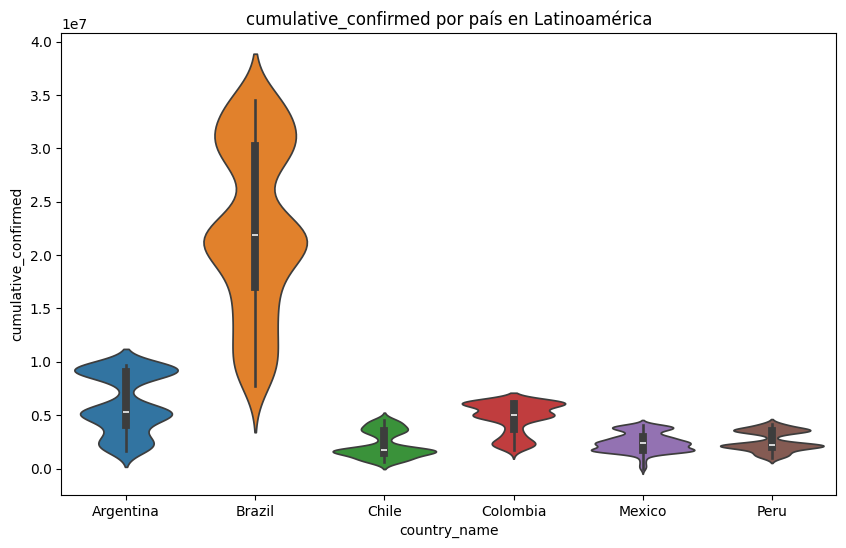

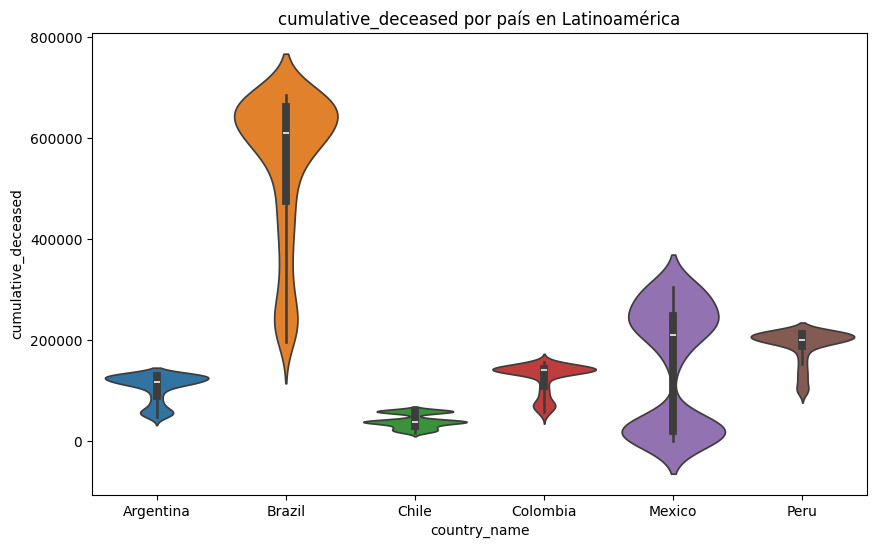

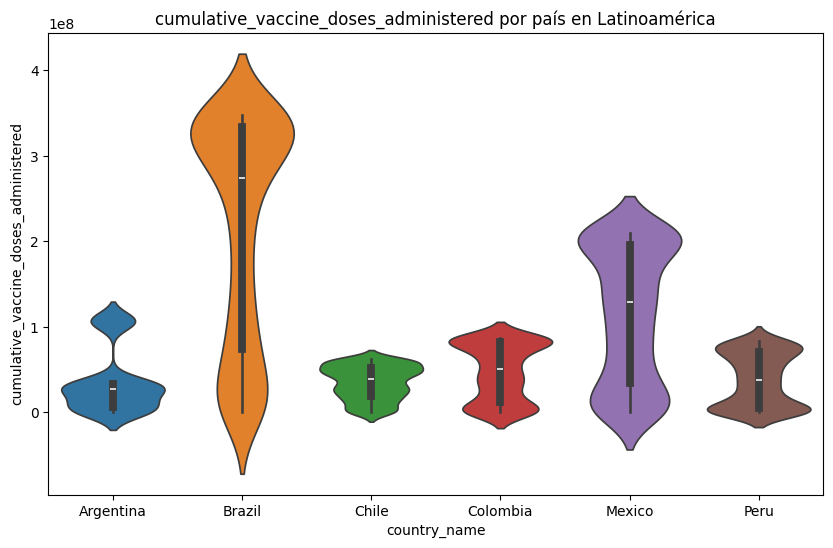

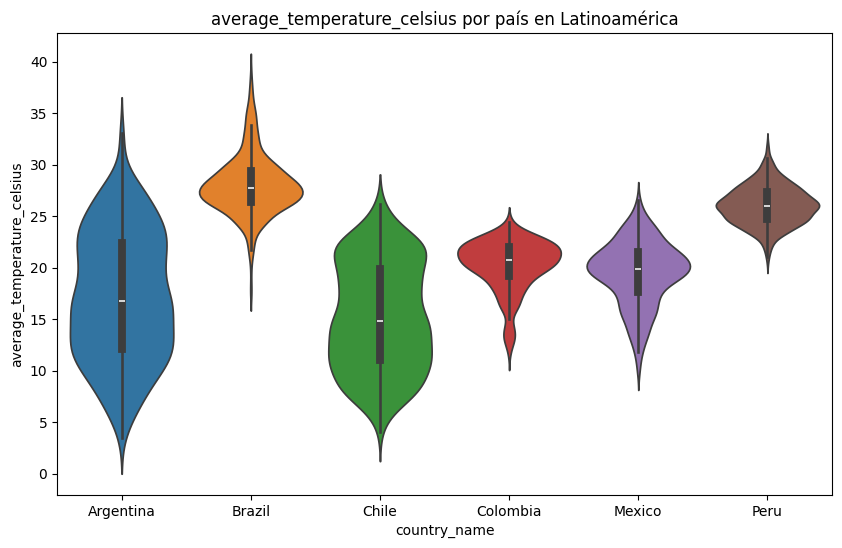

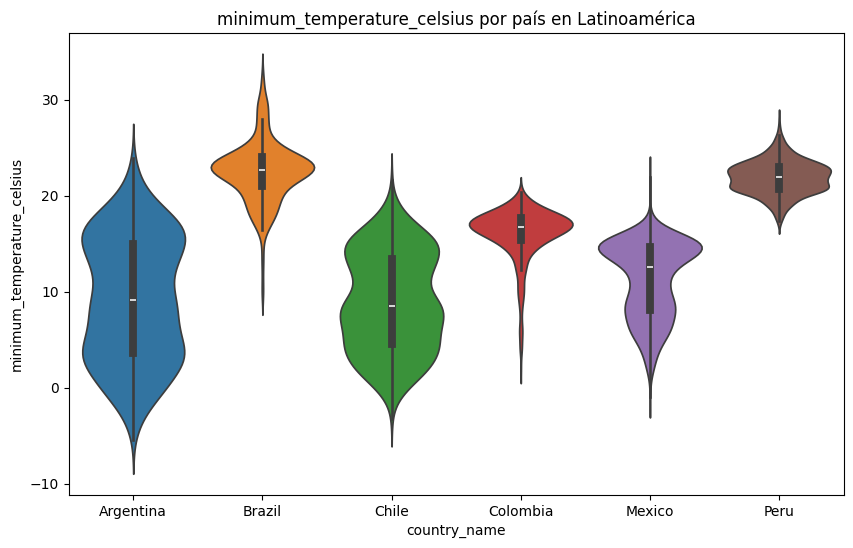

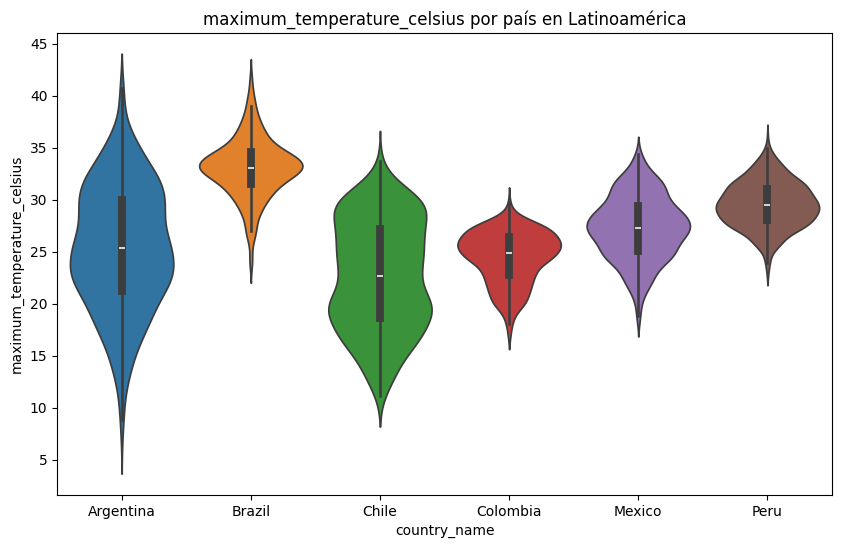

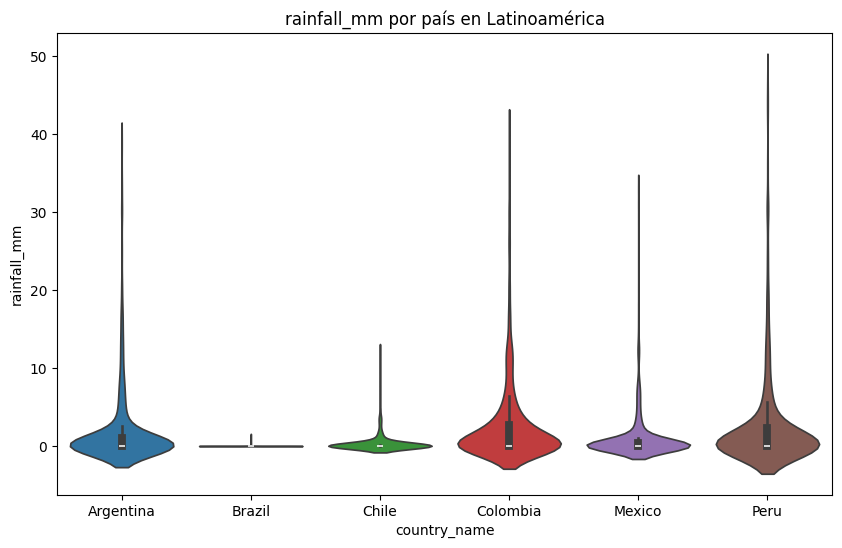

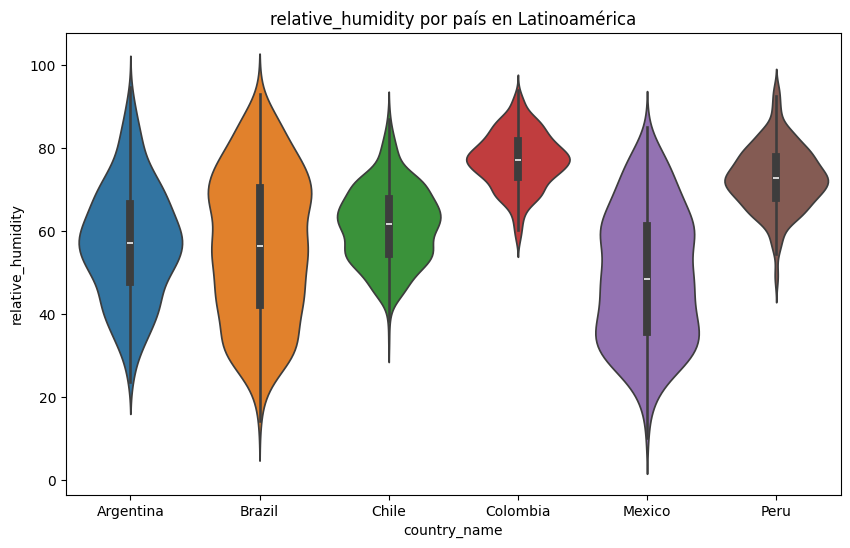

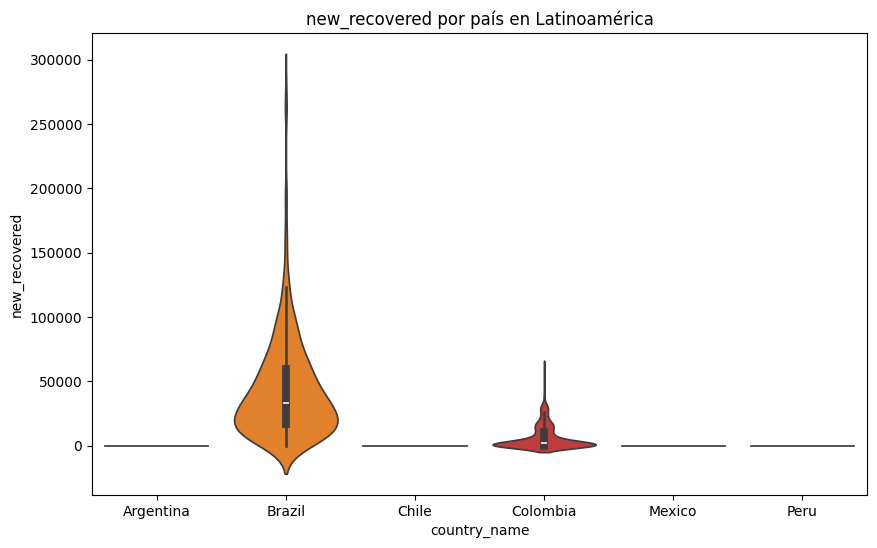

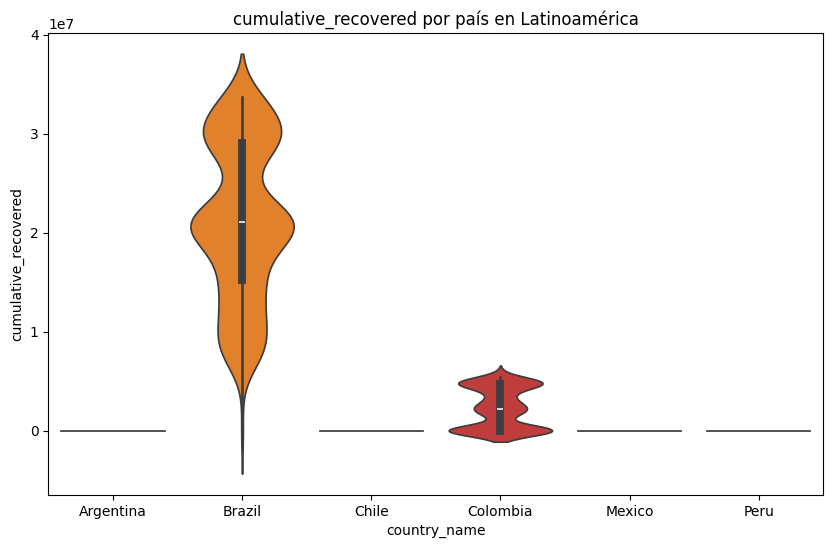

In [27]:
# se crea un dataframa con las columnas mayores a 6 por ser las que tienen valores diferentes para cada país
columnas_mayores_6=[]
for i in data_final.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude"]:
        if data_final[i].nunique()>6:
            columnas_mayores_6.append(i)
# se agrega a columnas_mayores_6 la columna country_name para poder hacer análisis por país
columnas_mayores_6.append("country_name")

# se crea el dataframe con las columnas mayores a 6
data_final_mayores_6 = data_final[columnas_mayores_6]

# se crea gráfico violín de todos los países para variables numéricas
for i in data_final_mayores_6.columns:
        if i not in ["location_key", "date", "country_code", "latitude", "longitude", "country_name"]:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.violinplot(x="country_name", y=i, data=data_final_mayores_6, ax=ax, hue="country_name")
            plt.title(f"{i} por país en Latinoamérica")
            plt.show()

Con el objetivo de entender mejor los datos disponibles se amplía el análisis calculando la distribución de la población por grupos de edades.

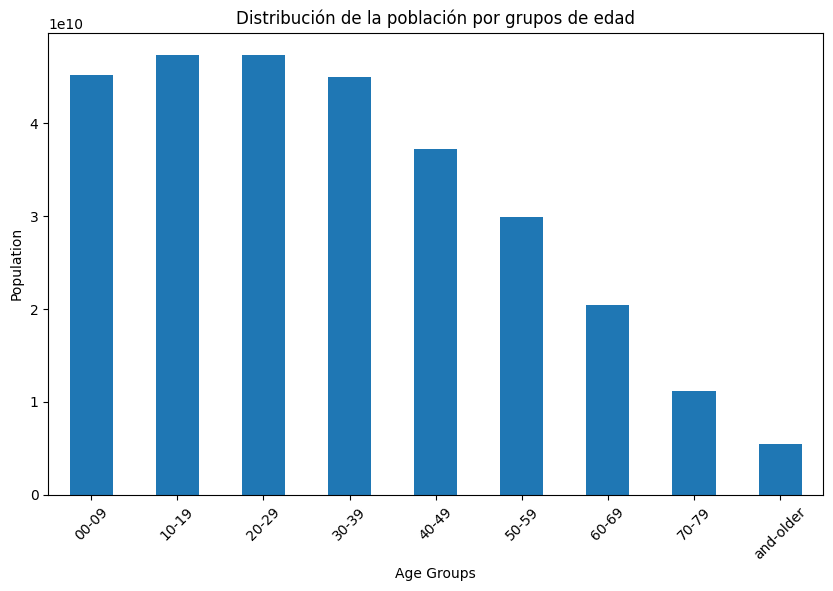

In [6]:
# se calcula la distribución de la población por grupos de edad
age_columns = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39", "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79", "population_age_80_and_older"]
age_distribution = data_final[age_columns].sum()    

plt.figure(figsize=(10, 6))
age_distribution.plot(kind="bar", stacked=True)
plt.xlabel("Age Groups")
plt.ylabel("Population")
plt.title("Distribución de la población por grupos de edad")
plt.xticks(range(len(age_columns)), [col.split("_")[-2] + "-" + col.split("_")[-1] for col in age_columns], rotation=45)
plt.show()

Obtenida la distribución de la población, se procede a realizar un nuevo agrupamiento etario para tener una estimación de vacunación por grupo. 

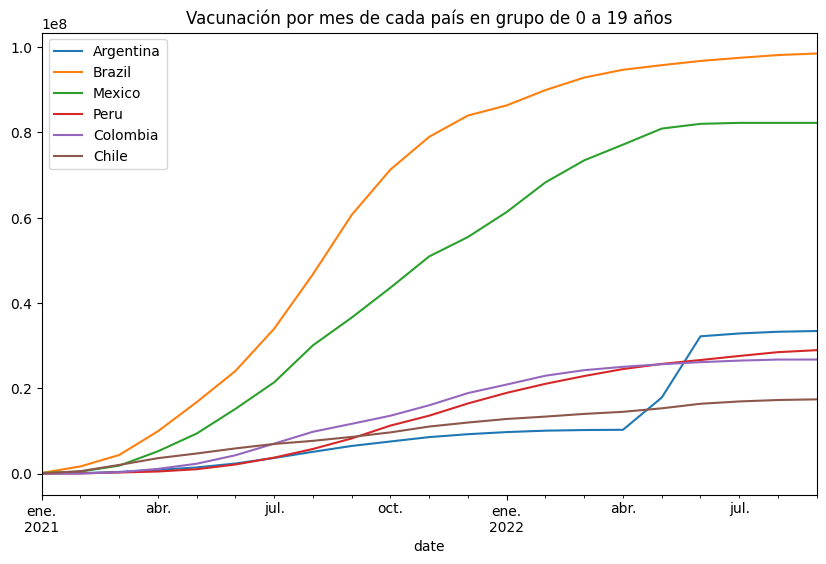

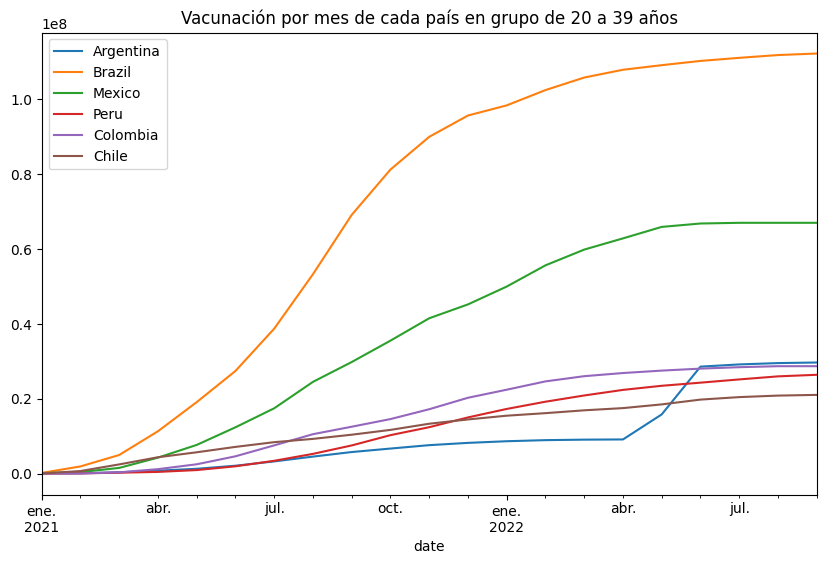

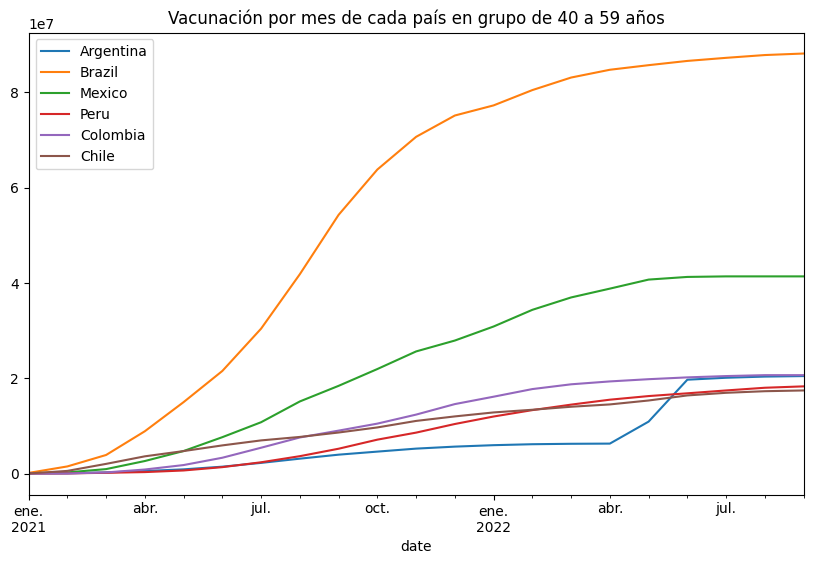

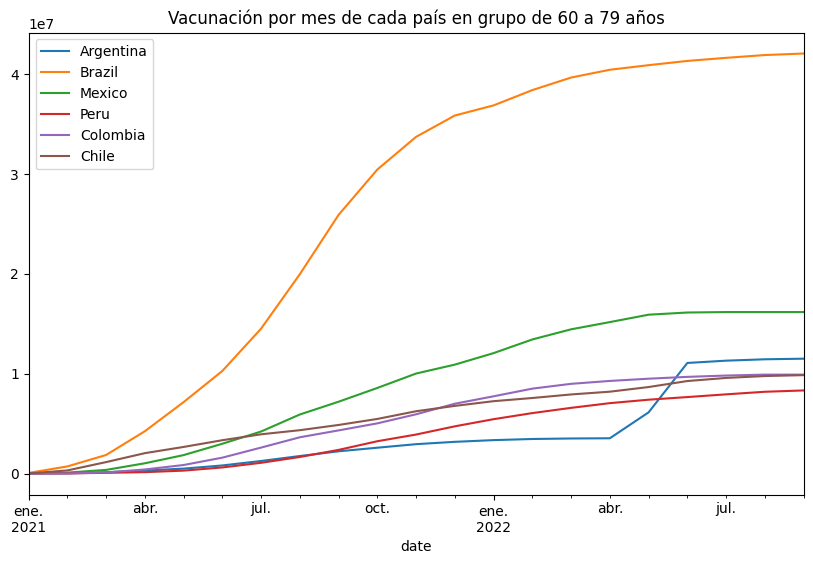

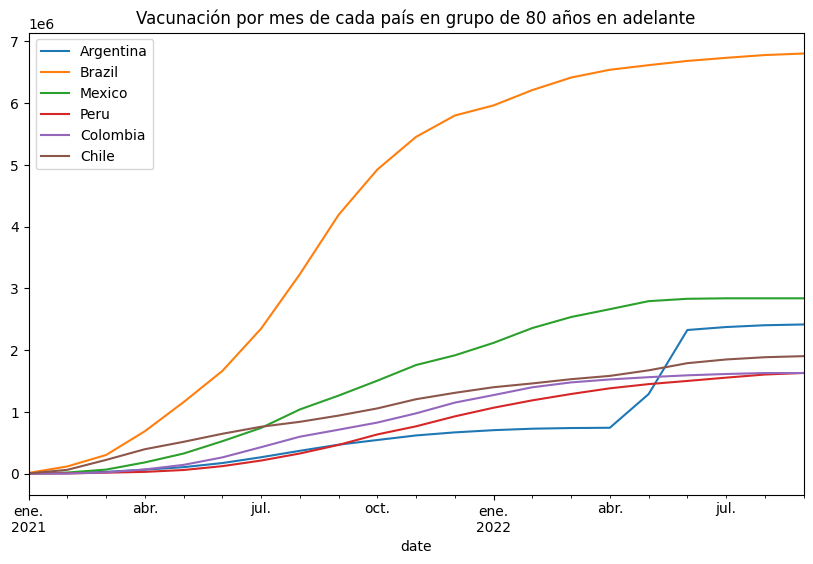

In [7]:
# grupo etario más vacunado
data_final["population_age_00_19"]=data_final["population_age_00_09"] + data_final["population_age_10_19"] 
data_final["population_age_20_39"]=data_final["population_age_20_29"] + data_final["population_age_30_39"]
data_final["population_age_40_59"]=data_final["population_age_40_49"] + data_final["population_age_50_59"]
data_final["population_age_60_79"]=data_final["population_age_60_69"] + data_final["population_age_70_79"]
data_final["population_age_80_and_older"]=data_final["population_age_80_and_older"]
# estimacion de vacunados sobre la poblacion total
data_final["population_age_00_19_vacunados"]=data_final["cumulative_vaccine_doses_administered"] * data_final["population_age_00_19"]/data_final["population"] 
data_final["population_age_20_39_vacunados"]=data_final["cumulative_vaccine_doses_administered"] * data_final["population_age_20_39"]/data_final["population"] 
data_final["population_age_40_59_vacunados"]=data_final["cumulative_vaccine_doses_administered"] * data_final["population_age_40_59"]/data_final["population"] 
data_final["population_age_60_79_vacunados"]=data_final["cumulative_vaccine_doses_administered"] * data_final["population_age_60_79"]/data_final["population"] 
data_final["population_age_80_and_older_vacunados"]=data_final["cumulative_vaccine_doses_administered"] * data_final["population_age_80_and_older"]/data_final["population"] 
# rellenado con 0 en caso de algun valor faltante
data_final["population_age_00_19_vacunados"]=data_final["population_age_00_19_vacunados"].fillna(0)
data_final["population_age_20_39_vacunados"]=data_final["population_age_20_39_vacunados"].fillna(0)
data_final["population_age_40_59_vacunados"]=data_final["population_age_40_59_vacunados"].fillna(0)
data_final["population_age_60_79_vacunados"]=data_final["population_age_60_79_vacunados"].fillna(0)
data_final["population_age_80_and_older_vacunados"]=data_final["population_age_80_and_older_vacunados"].fillna(0)
# cambiado a tipo entero
data_final["population_age_00_19_vacunados"]=data_final["population_age_00_19_vacunados"].astype(int)
data_final["population_age_20_39_vacunados"]=data_final["population_age_20_39_vacunados"].astype(int)
data_final["population_age_40_59_vacunados"]=data_final["population_age_40_59_vacunados"].astype(int)
data_final["population_age_60_79_vacunados"]=data_final["population_age_60_79_vacunados"].astype(int)
data_final["population_age_80_and_older_vacunados"]=data_final["population_age_80_and_older_vacunados"].astype(int)
# suma de cada grupo etario
data_final["population_age_00_19_vacunados"].sum()
data_final["population_age_20_39_vacunados"].sum()
data_final["population_age_40_59_vacunados"].sum()
data_final["population_age_60_79_vacunados"].sum()
data_final["population_age_80_and_older_vacunados"].sum()

# graficas de los valores medios de cumulative_vaccine_doses_administered de todos los países por grupo etario
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_00_19_vacunados"].plot()
plt.title("Vacunación por mes de cada país en grupo de 0 a 19 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_20_39_vacunados"].plot()
plt.title("Vacunación por mes de cada país en grupo de 20 a 39 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_40_59_vacunados"].plot()
plt.title("Vacunación por mes de cada país en grupo de 40 a 59 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_60_79_vacunados"].plot()
plt.title("Vacunación por mes de cada país en grupo de 60 a 79 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_final[data_final["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_80_and_older_vacunados"].plot()
plt.title("Vacunación por mes de cada país en grupo de 80 años en adelante")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

Siguiendo con el análisis detallado, se compara la mortalidad según el género de la población.

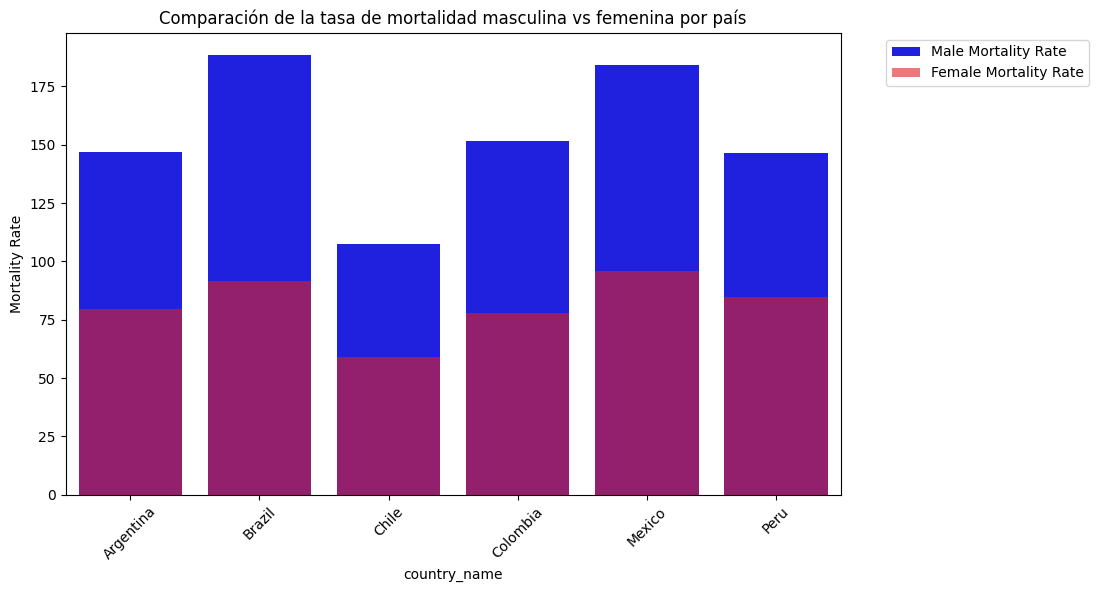

In [8]:
# mortalidad por género
plt.figure(figsize=(10, 6))
sns.barplot(data=data_final, x="country_name", y="adult_male_mortality_rate", color="blue", label="Male Mortality Rate")
sns.barplot(data=data_final, x="country_name", y="adult_female_mortality_rate", color="red", alpha=0.6, label="Female Mortality Rate")
plt.xticks(rotation=45)
plt.ylabel("Mortality Rate")
plt.title("Comparación de la tasa de mortalidad masculina vs femenina por país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


En el gráfico anterior se evidencia claramente lo superior que es la tasa de mortalidad masculina en comparación con la femenina.

Continuando en esta línea de análisis, se seleccionan algunas variables importantes para tratar de comprender mejor los resultados antes de tomar decisiones. Para el siguiente gráfico se utilizan los datos sobre densidad de población, prevalencia de fumar, prevalencia de diabetes, las muertes acumuladas y el índice de desarrollo humano, con el objetivo de encontrar alguna correlación fuerte entre estas variables.

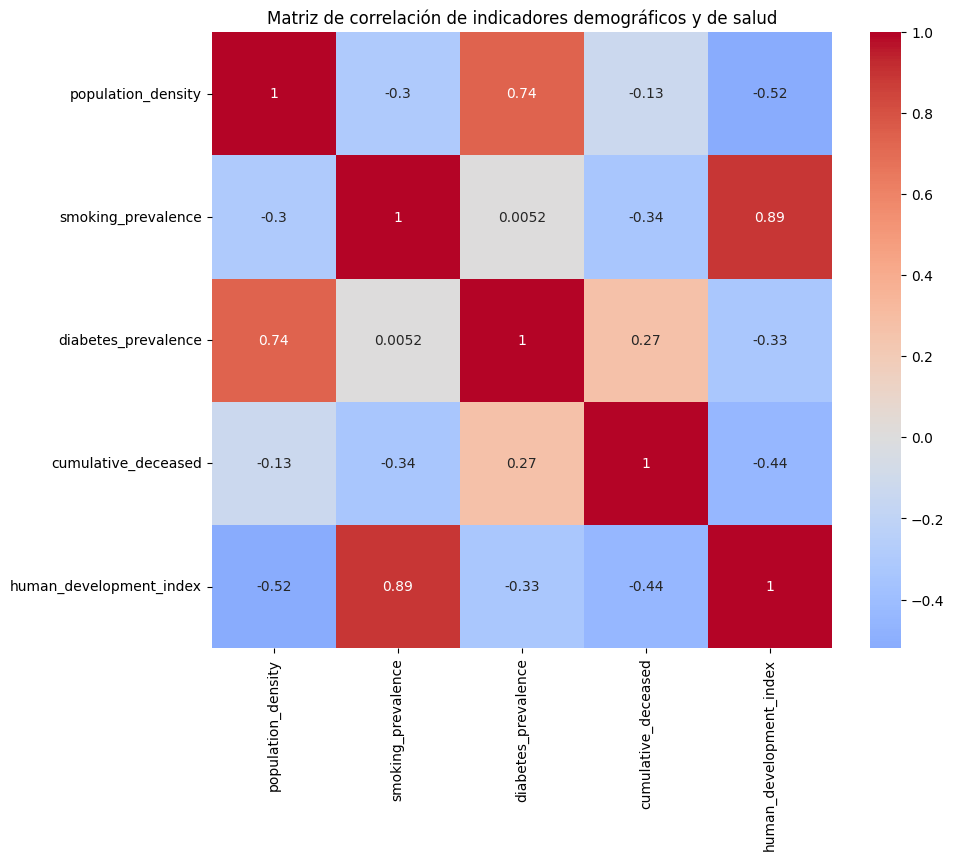

In [12]:
# se selecciona un subjconjunto de columnas para realizar análisis de correlación
columnas = ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased", "human_development_index"]
correlation_matriz = data_final[columnas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matriz, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de indicadores demográficos y de salud")
plt.show()

El mapa de calor anterior demuestra una alta correlación positiva entre densidad poblacional y prevalencia de diabetes, así como también entre índice de desarrollo humano y prevalencia de fumar.

Se complementa el análisis con la comparación de las muertes por CVID-19 con la prevalencia de diabetes y de fumar. 

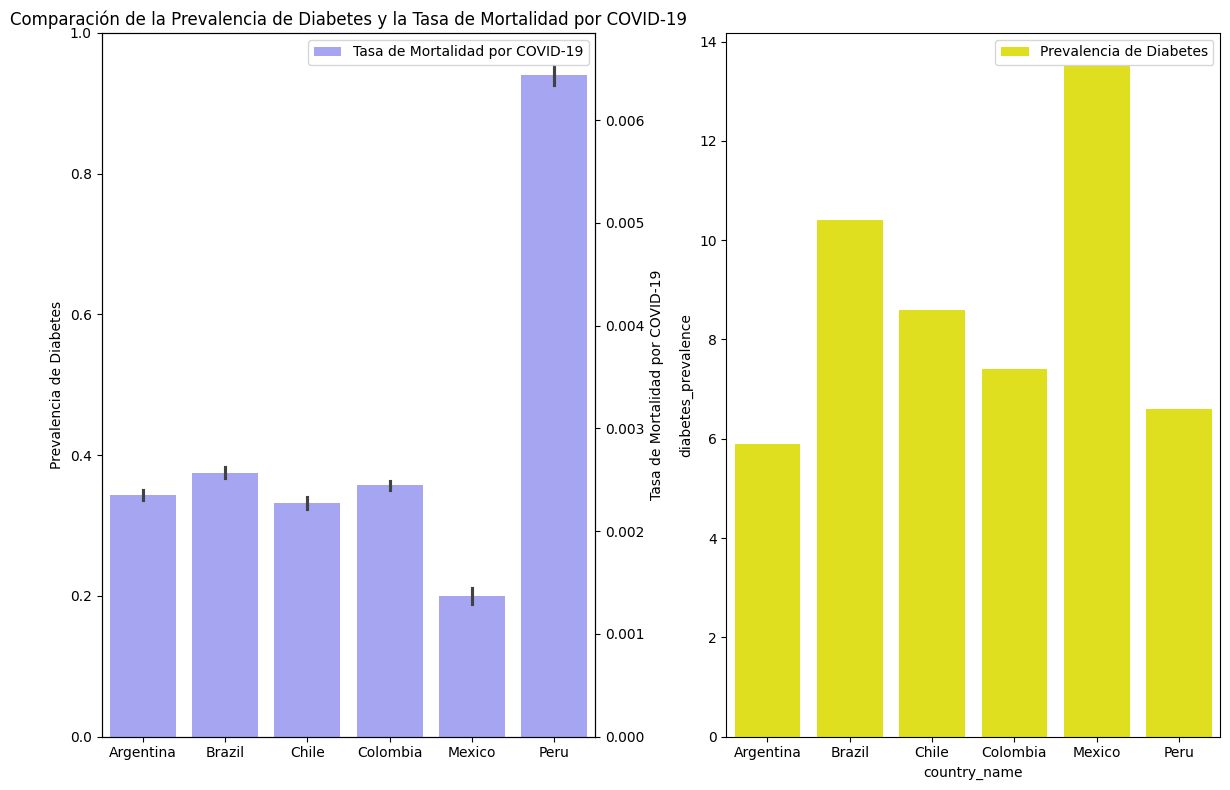

In [15]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data_final, x=data_final["country_name"], y=data_final["diabetes_prevalence"], color="yellow", label="Prevalencia de Diabetes")
ax2 = ax.twinx() # los dos graficos comparten el eje x
sns.barplot(data=data_final, x=data_final["country_name"], y=data_final["cumulative_deceased"]/data_final["population"], color="blue", label="Tasa de Mortalidad por COVID-19", ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalencia de Diabetes")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show()

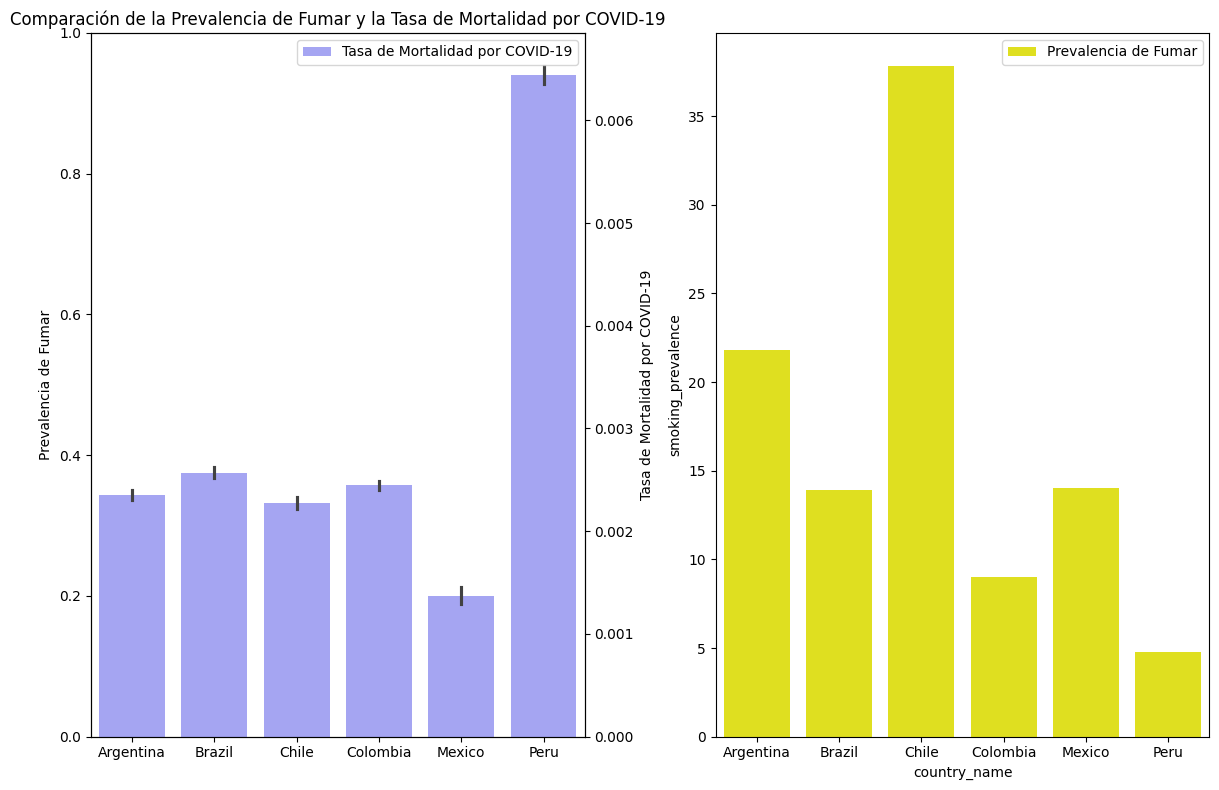

In [16]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data_final, x=data_final["country_name"], y=data_final["smoking_prevalence"], color="yellow", label="Prevalencia de Fumar")
ax2 = ax.twinx() # los dos graficos comparten el eje x
sns.barplot(data=data_final, x=data_final["country_name"], y=data_final["cumulative_deceased"]/data_final["population"], color="blue", label="Tasa de Mortalidad por COVID-19", ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalencia de Fumar")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show()

#### Avance 3

In [5]:
# lectura del archivo final
data_final=pd.read_csv("DatosFinales.csv", sep=",")

# Se ejecuta la variable paises_seleccionados nuevamente para realizar el avance 3
paises_seleccionados = ["Argentina", "Brazil", "Mexico", "Peru", "Colombia", "Chile"] 

# Se convierte la columna date a datetime y se establece como índice del dataframe
data_final["date"] = pd.to_datetime(data_final["date"]) 
data_final.set_index("date", inplace=True) 

Se realiza análisis del comportamiento de los nuevos casos confirmados de COVID-19 de manera semanal y mensual.

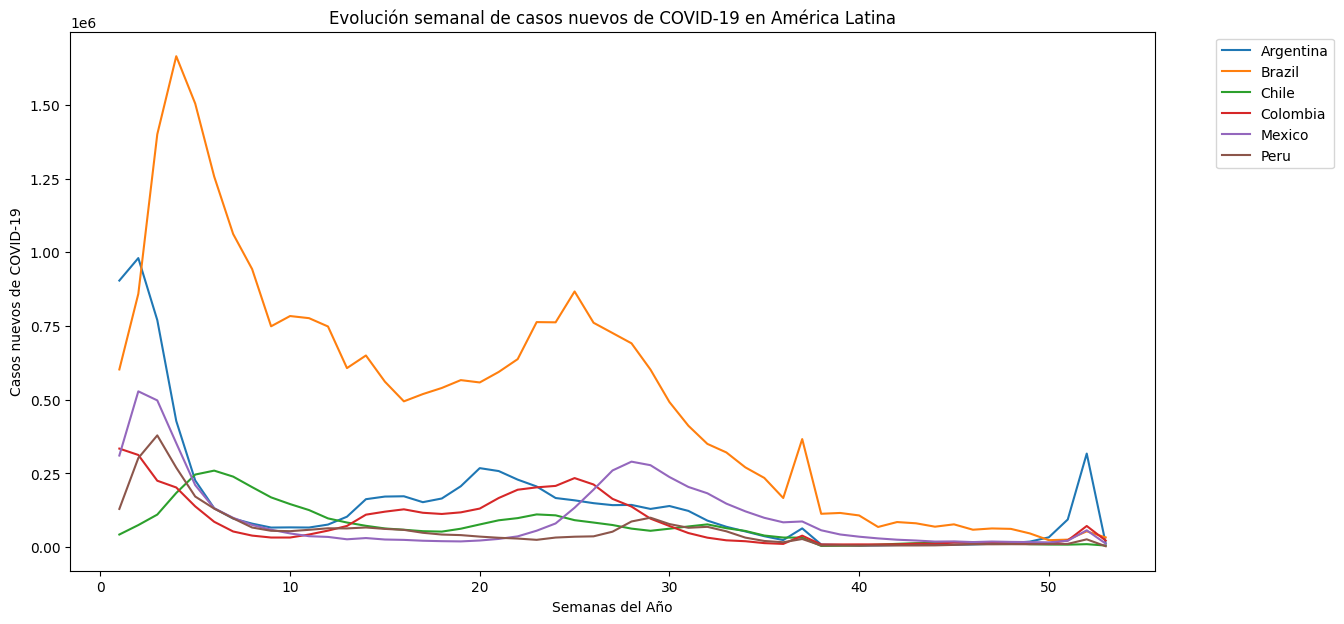

In [6]:
# evolución de nuevos casos por semana a lo largo del tiempo 
data_final["week"] = data_final.index.isocalendar().week # funcion isocalendar para poder realiar un análisis por semana usando la columna de fechas  
data_final["year"] = data_final.index.isocalendar().year
casos_semanales = data_final.groupby(["country_name", "week"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14, 7))
for pais in casos_semanales["country_name"].unique():
    paises_casos_semanales = casos_semanales[casos_semanales["country_name"] == pais]
    plt.plot(paises_casos_semanales["week"], paises_casos_semanales["new_confirmed"], label=pais)

plt.xlabel("Semanas del Año")
plt.ylabel("Casos nuevos de COVID-19")
plt.title("Evolución semanal de casos nuevos de COVID-19 en América Latina")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



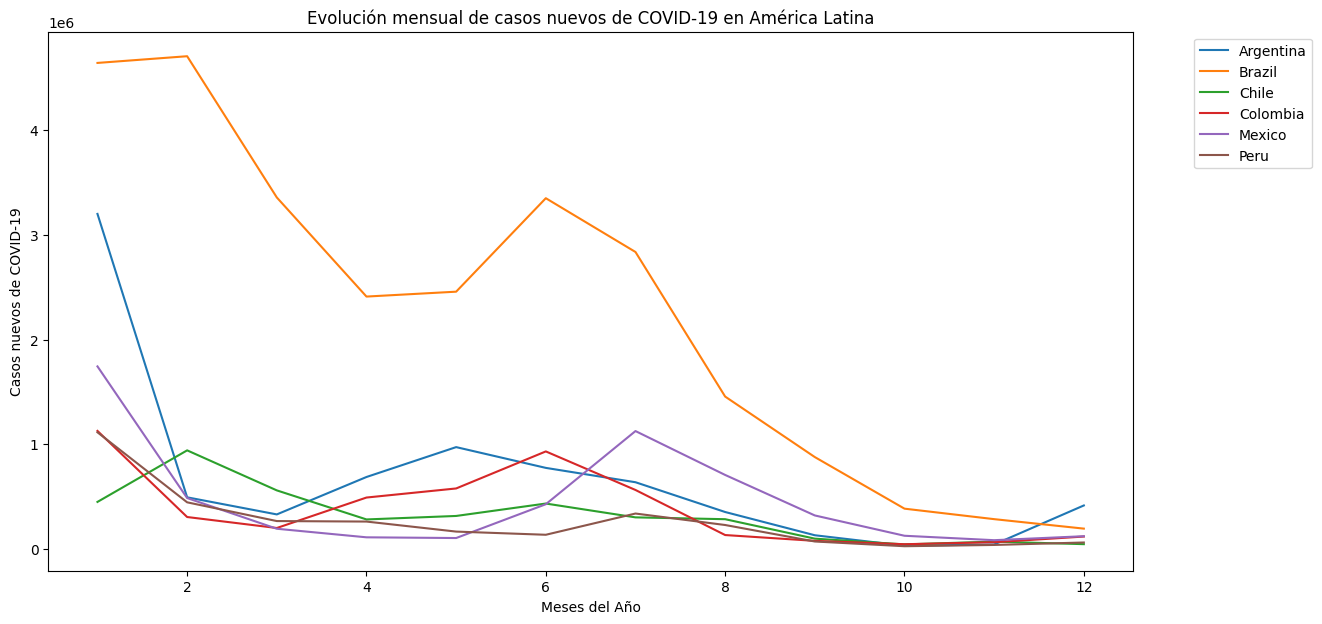

In [10]:
# evolución de nuevos casos por mes a lo largo del tiempo 
data_final["month"] = data_final.index.month
casos_mensuales = data_final.groupby(["country_name", "month"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14, 7))
for pais in casos_mensuales["country_name"].unique():
    paises_casos_mensuales = casos_mensuales[casos_mensuales["country_name"] == pais]
    plt.plot(paises_casos_mensuales["month"], paises_casos_mensuales["new_confirmed"], label=pais)

plt.xlabel("Meses del Año")
plt.ylabel("Casos nuevos de COVID-19")
plt.title("Evolución mensual de casos nuevos de COVID-19 en América Latina")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



En los dos últimos gráficos puede verse claramente como los casos nuevos confirmados de COVID-19 han disminuído de forma considerable. Seguramente, sea el resultado de la fuerte campaña de vacunación que se ha llevado a cabo en todos los países desde la obtención de una vacuna efectiva contra la enfermedad.

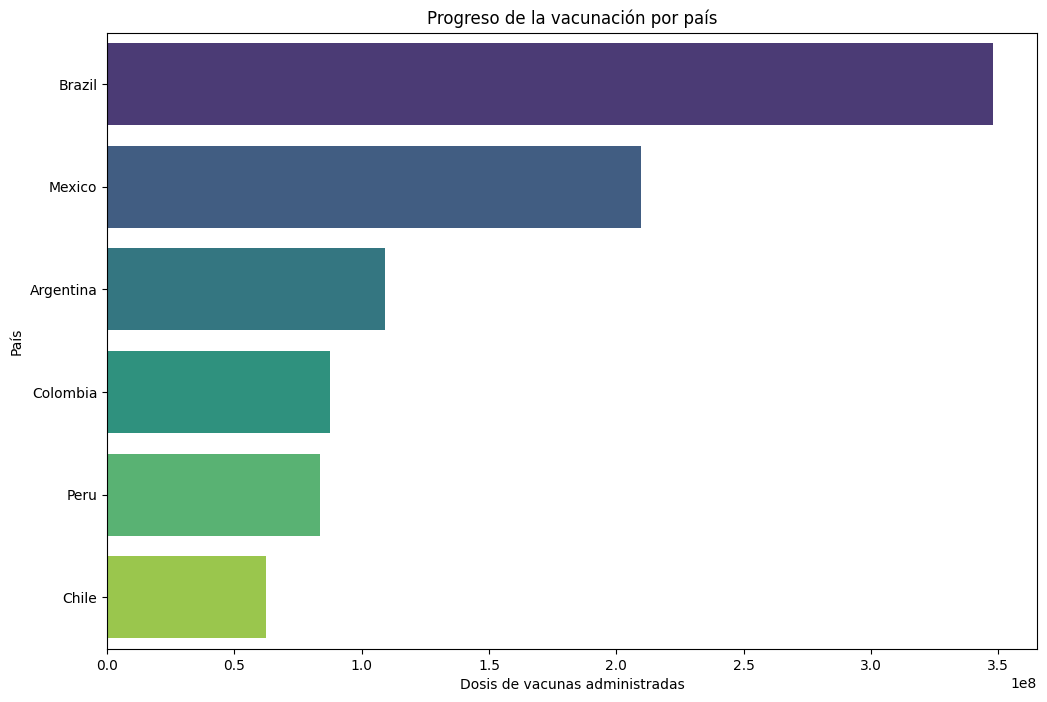

In [13]:
# se grafica el progreso de vacunación por país
datos_vacunacion = data_final.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, hue=datos_vacunacion.index, palette="viridis")
plt.xlabel("Dosis de vacunas administradas")
plt.ylabel("País")
plt.title("Progreso de la vacunación por país")
plt.show()

Es claro que Brasil fue el país que más vacunas aplicó durante el período de tiempo analizado, aunque no debe perderse de vista el hecho de que también es el país con más habitantes.

Se continúa analizando una posible relación entre la temperatura promedio y los casos nuevos confirmados.

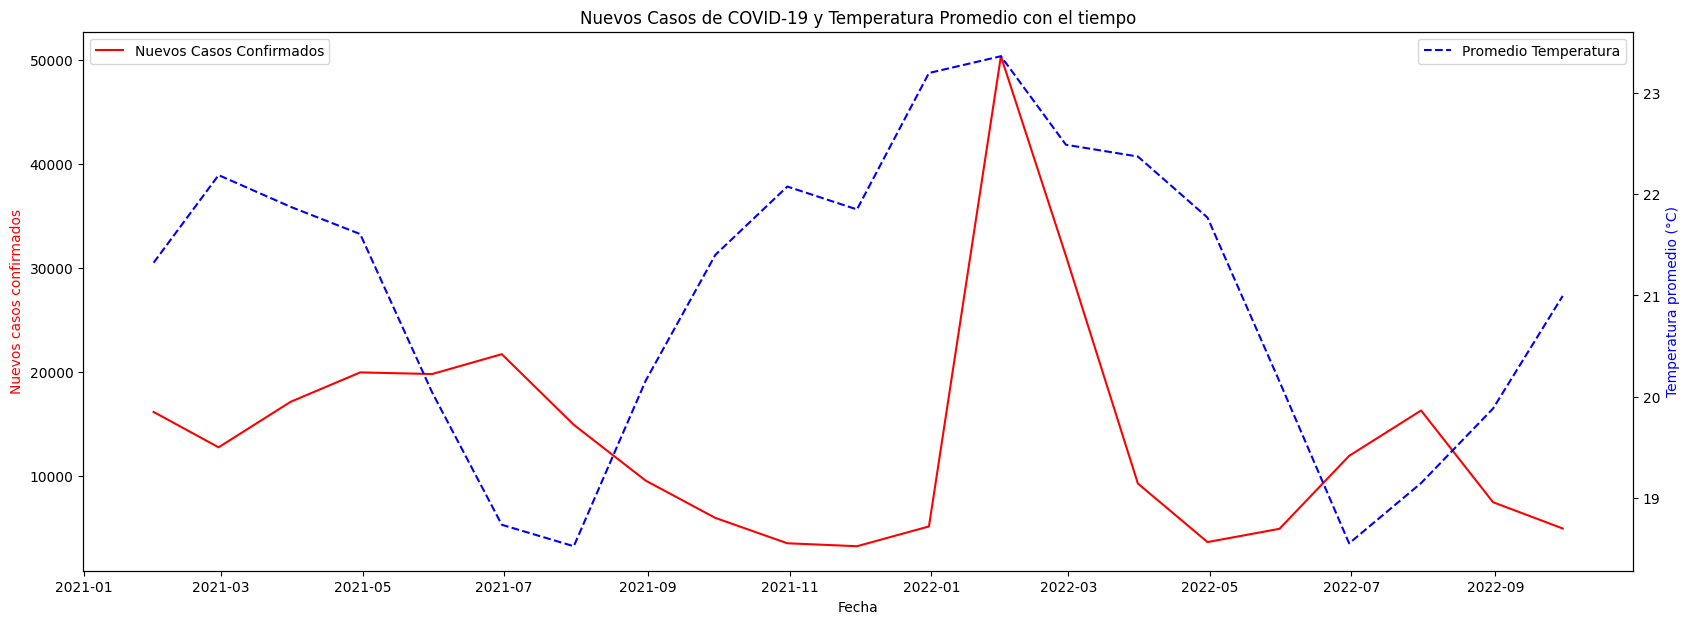

In [15]:
# se grafica la relación entre temperatura promedio y nuevos casos
plt.figure(figsize=(20, 7))
ax1 = plt.gca() # esta función obtiene los ejes de la figura actual, en caso de no haber crea nuevos
ax2 = ax1.twinx() # se utiliza el mismo eje x para ambas gráficas
ax1.plot(data_final.resample("ME").mean(numeric_only=True).index, data_final.resample("ME").mean(numeric_only=True)["new_confirmed"], color="red", label="Nuevos Casos Confirmados")
ax2.plot(data_final.resample("ME").mean(numeric_only=True).index, data_final.resample("ME").mean(numeric_only=True)["average_temperature_celsius"], color="blue", label="Promedio Temperatura", linestyle=("--"))

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos casos confirmados", color="red")
ax2.set_ylabel("Temperatura promedio (°C)", color="blue")
plt.title("Nuevos Casos de COVID-19 y Temperatura Promedio con el tiempo")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Si bien anteriormente se había visto, mediante un gráfico de dispersión, que la temperatura y los nuevos casos no tienen una profunda relación, con éste gráfico puede reafirmarse esa conclusión preliminar.

Se profundiza en el análisis del impacto que tiene la densidad poblacional y la urbanización en la evolución de la pandemia.

C:\Users\sosab\AppData\Local\Temp\ipykernel_6596\2181975305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")


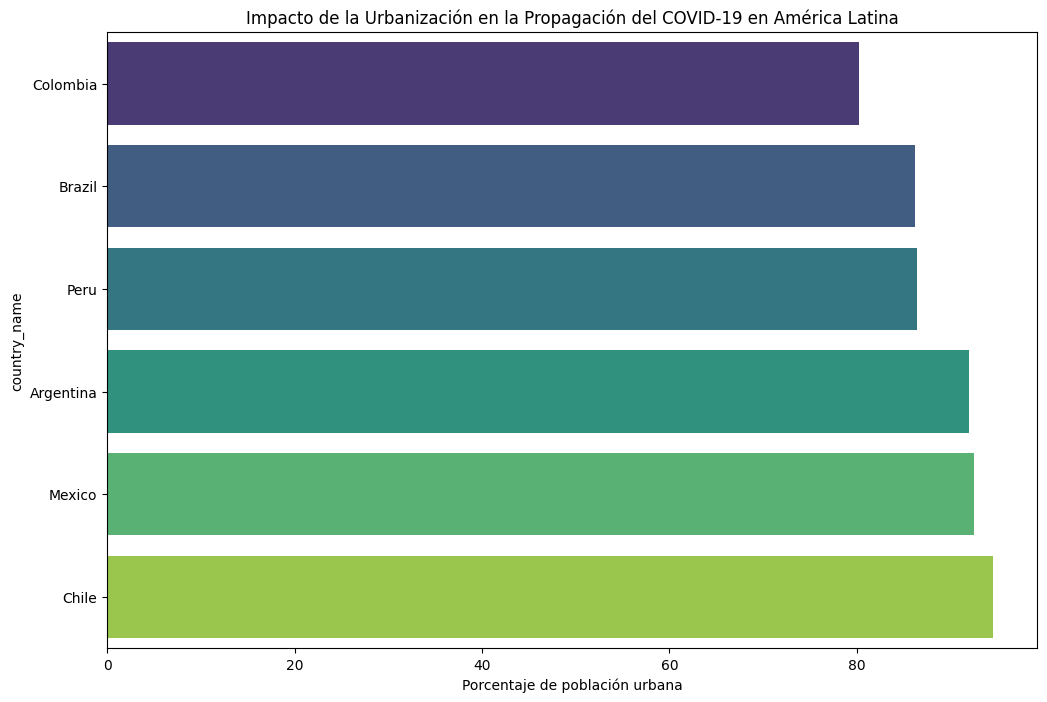

In [29]:
# se grafica el impacto de la urbanización en la evolución de la pandemia
# se utiliza el último registro porque son todos iguales y se ordena por porcentaje de población
data_final["urban_population_percentage"] = data_final["population_urban"] / data_final["population"] * 100
urban_cases = data_final.groupby("country_name").last().sort_values(by="urban_population_percentage") 

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")
plt.xlabel("Porcentaje de población urbana")
plt.title("Impacto de la Urbanización en la Propagación del COVID-19 en América Latina")
plt.show()

Se decide analizar la distibución de los grupos etarios solo en los tres países con la tasa de mortalidad más alta. 

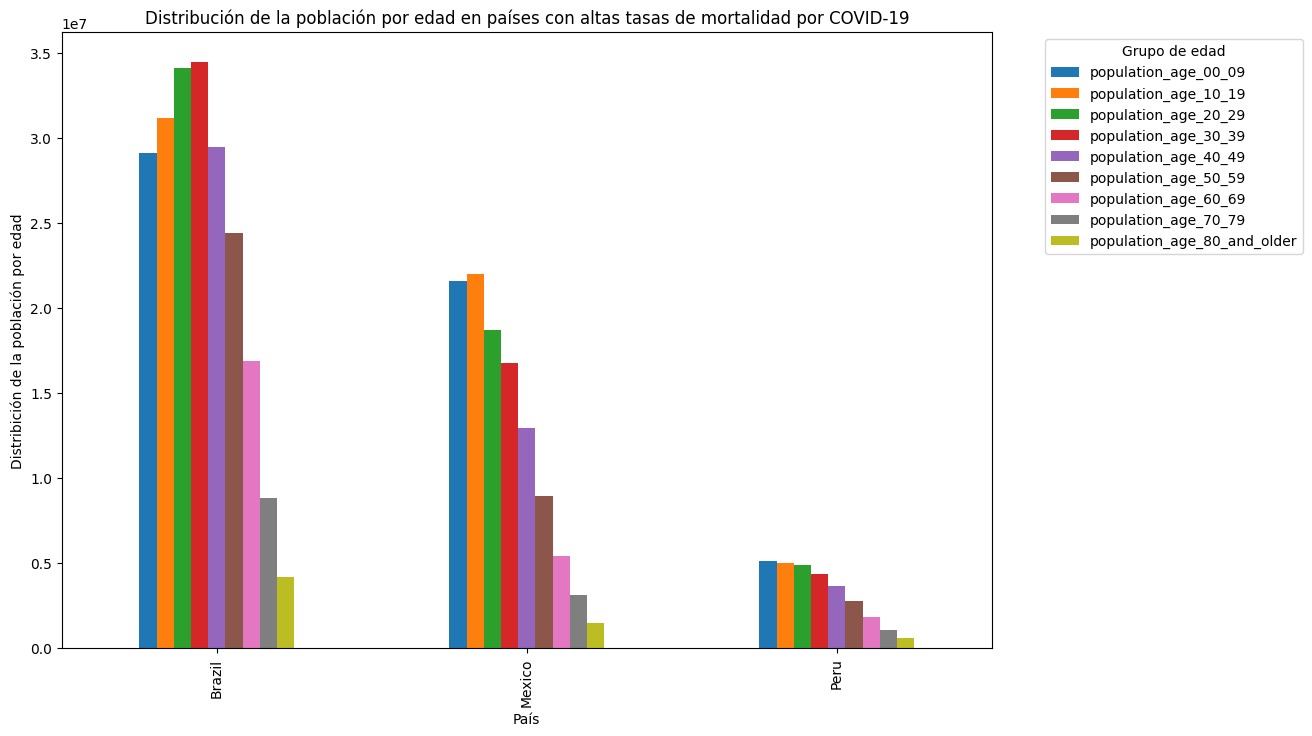

In [21]:
# solo se analizan los tres países con la tasa de mortalidad más alta
high_mortality_countries = data_final.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).head(3).index
age_groups = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39", "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79", "population_age_80_and_older"]
age_distribution_mortality = data_final[data_final["country_name"].isin(high_mortality_countries)].groupby("country_name")[age_groups].mean() 

age_distribution_mortality.plot(kind="bar", stacked=False, figsize=(12, 8))
plt.xlabel("País")
plt.ylabel("Distribición de la población por edad")
plt.title("Distribución de la población por edad en países con altas tasas de mortalidad por COVID-19")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Grupo de edad")
plt.show()

El gráfico anterior demuestra la desigualdad en la cantidad de población de los grupos de edades. Si bien no proporciona una información relevante en este caso, es valiosa para futuros análisis.

Continuando, se observa cómo fueron las estrategias de vacunación para disminuir la mortalidad y los casos confirmados.

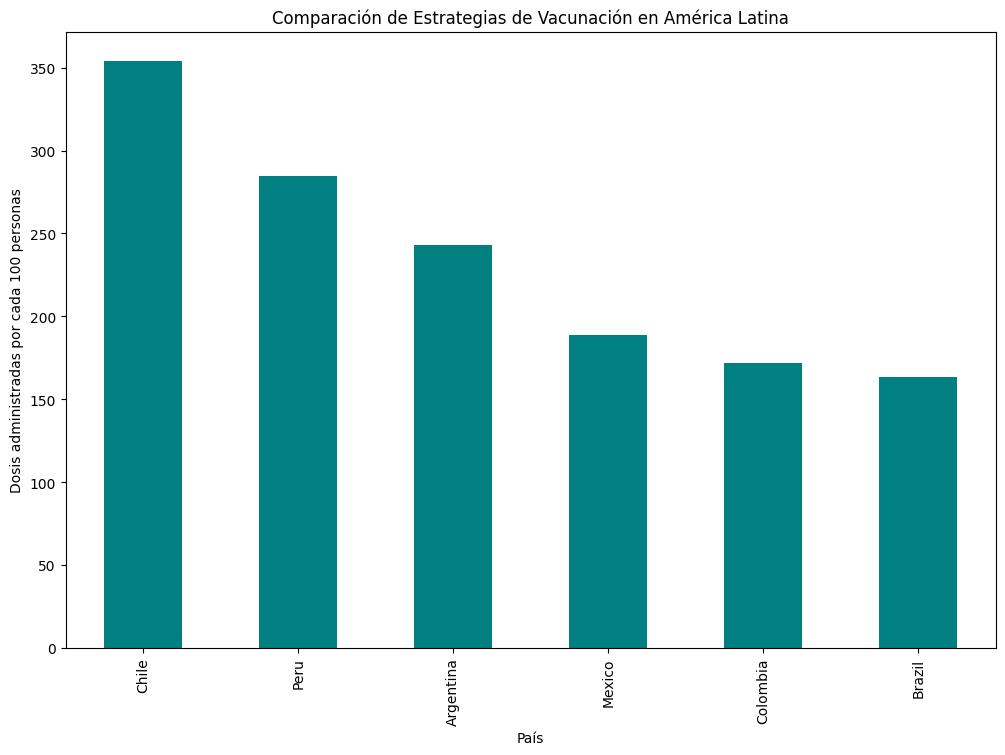

In [23]:
# se calcula la vacunación cada 100 personas por país
vaccination_strategy = data_final.groupby("country_name")["cumulative_vaccine_doses_administered"].max() / data_final.groupby("country_name")["population"].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind="bar", figsize=(12, 8), color="teal")
plt.xlabel("País")
plt.ylabel("Dosis administradas por cada 100 personas")
plt.title("Comparación de Estrategias de Vacunación en América Latina")
plt.show()

Puede verse que Chile fue quién mejor manejó la aplicación de vacunas, seguido por Perú y Argentina. Esto puede ser debido a varios factores como un mejor acceso a las dosis, gestiones de gobierno acertadas o a la baja cantidad de población de cada país respecto a otros como Brasil y México.

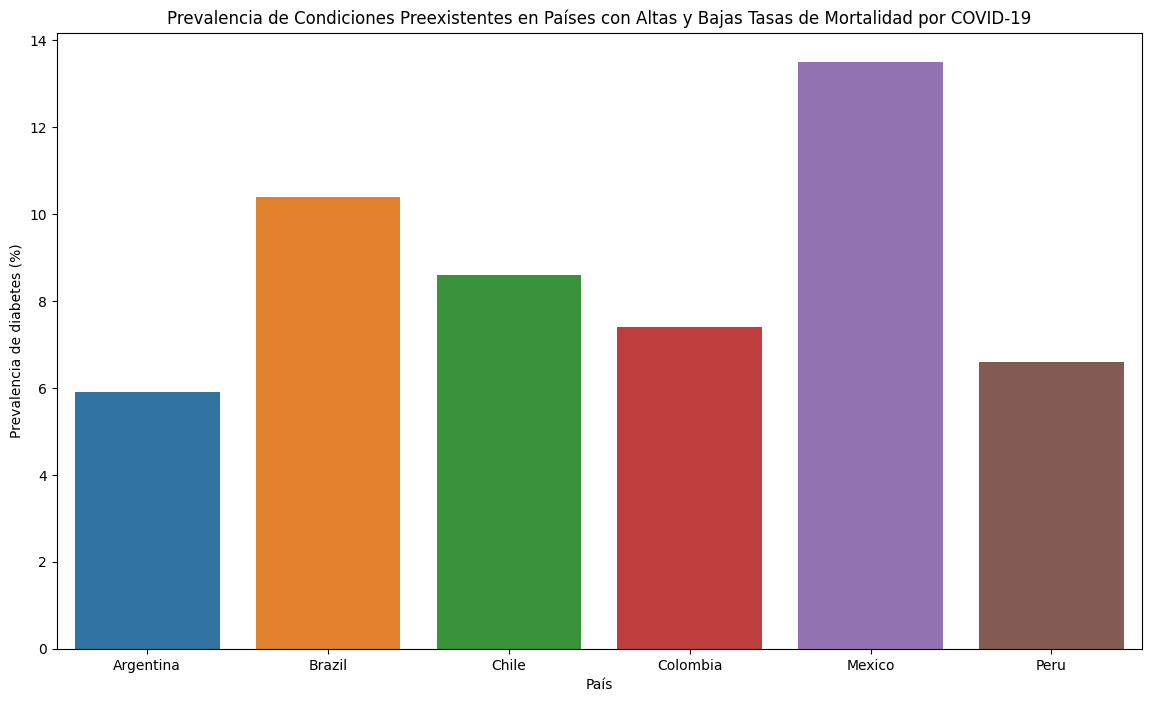

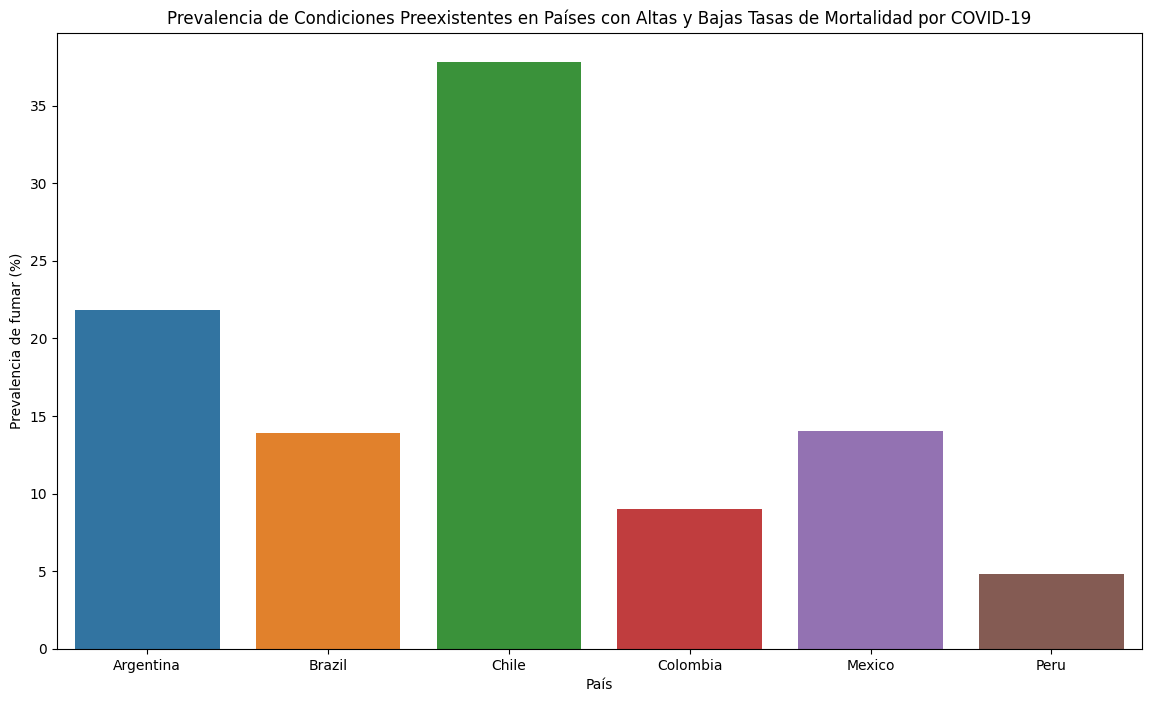

In [24]:
# este paso es solo demostrativo ya que solo tenemos 6 países
top_countries = data_final.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index # se seleccionan los cinco países más grandes
botton_countries = data_final.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index # se seleccionan los cinco países más chicos
conditions_data = data_final[data_final["country_name"].isin(top_countries.union(botton_countries))] # se unifican en una misma variable los 10 países extremos

# prevalencia de diabetes
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x="country_name", y="diabetes_prevalence", hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de diabetes (%)")
plt.title("Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19")
plt.show()

# prevalencia de fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x="country_name", y="smoking_prevalence", hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de fumar (%)")
plt.title("Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19")
plt.show()

Se continúa el análisis con el cálculo de la tasa de letalidad por país.

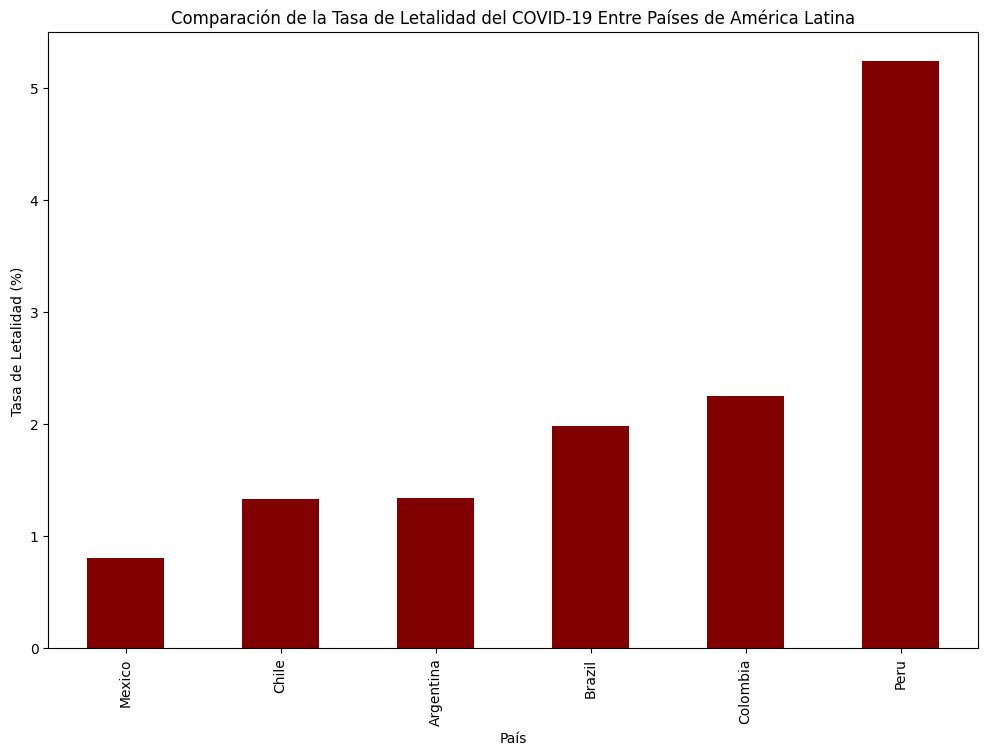

In [28]:
# se calcula la tasa de letalidad por país
data_final["case_fatality_rate"] = data_final["cumulative_deceased"] / data_final["cumulative_confirmed"] * 100
fatality_rates = data_final.groupby("country_name")["case_fatality_rate"].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind="bar", color="maroon")
plt.xlabel("País")
plt.ylabel("Tasa de Letalidad (%)")
plt.title("Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina")
plt.show()

Se puede ver una diferencia importante entre las tasas de letalidad de los países. Siendo Perú el país con el porcentaje de fallecimientos más alto, duplicando (en porcentaje) a Colombia, que se encuentra en segundo lugar.  

A continuación se calcula el porcentaje de vacunación y con ello se ve como ha generado una baja muy importante de casos nuevos el alto porcentaje personas vacunadas.

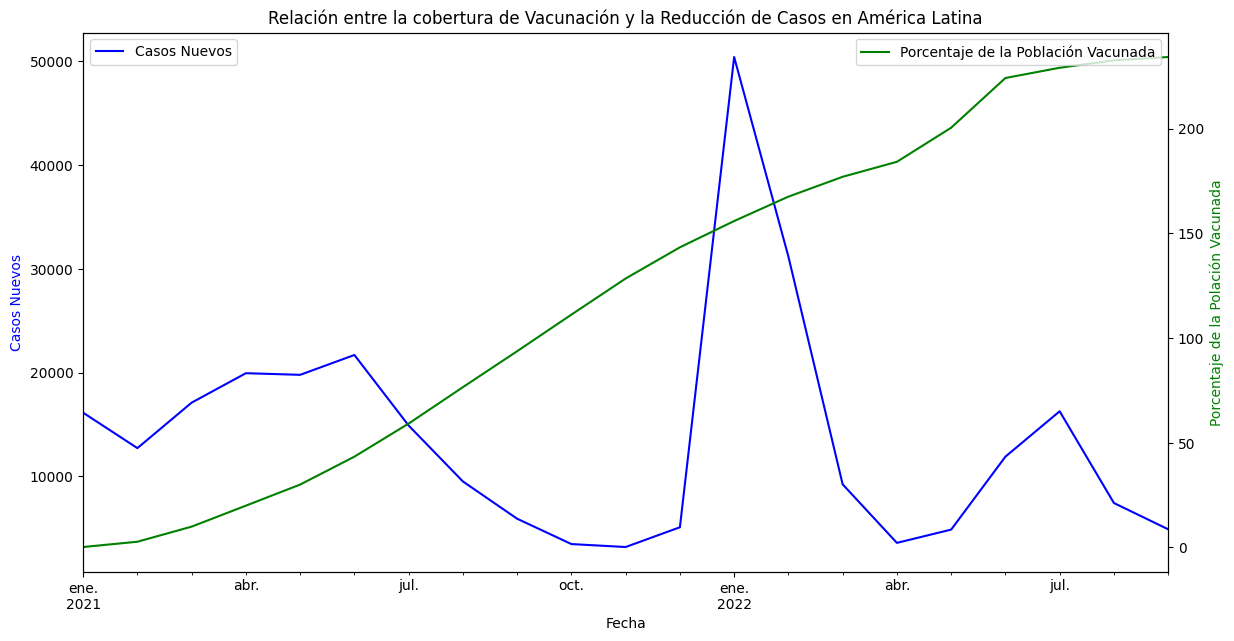

In [31]:
# relación entre la vacunación y la reducción de casos nuevos
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# se calcula porcentaje de vacunación
data_final["percentage_vaccinated"] = (data_final["cumulative_vaccine_doses_administered"] / data_final["population"]) * 100
data_final.resample("ME").mean(numeric_only=True)["new_confirmed"].plot(ax=ax1, color="blue", label="Casos Nuevos")
data_final.resample("ME").mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2, color="green", label="Porcentaje de la Población Vacunada")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Nuevos", color="blue")
ax2.set_ylabel("Porcentaje de la Polación Vacunada", color="green")
ax1.set_title("Relación entre la cobertura de Vacunación y la Reducción de Casos en América Latina")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Se observa, a continuación, cómo evolucionó la tasa de mortalidad a lo largo del tiempo quedando claro que disminuyó notablemente desde Enero de 2022.

C:\Users\sosab\AppData\Local\Temp\ipykernel_6596\2720948403.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_final, x="date", y="mortality_rate", estimator="mean", ci=None)


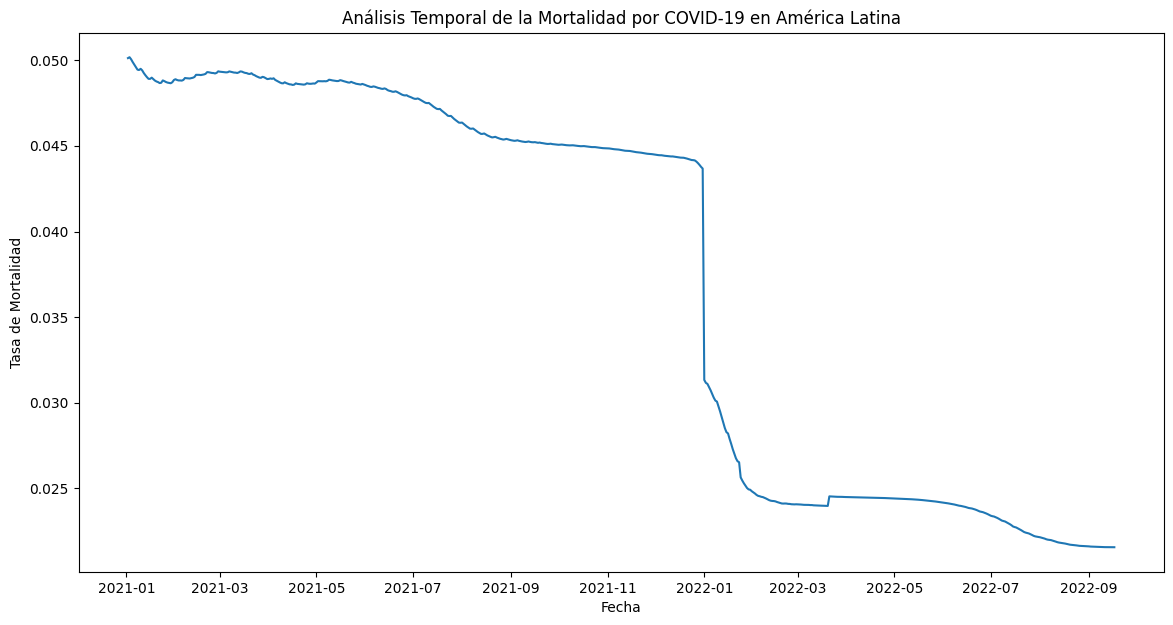

In [33]:
# evolución de la mortalidad
data_final["mortality_rate"] = data_final["cumulative_deceased"] / data_final["cumulative_confirmed"]

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_final, x="date", y="mortality_rate", estimator="mean", ci=None) # estimación valor medio, no mostrar intervalos de confianza
plt.title("Análisis Temporal de la Mortalidad por COVID-19 en América Latina")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.show()

Se realiza un análisis temporal de la evolución de los casos activos y los recuperados, aunque solo se tienen datos de recuperados de Brasil y Colombia.

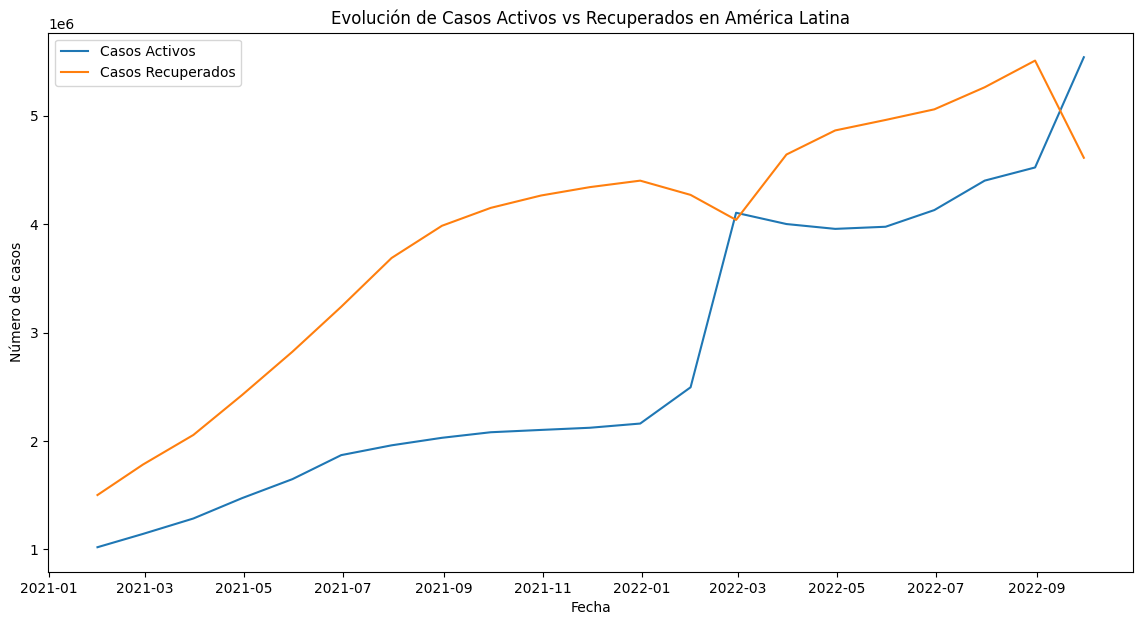

In [35]:
# evolución de casos activos vs recuperados
data_final["active_cases"] = data_final["cumulative_confirmed"] - data_final["cumulative_deceased"] - data_final["cumulative_recovered"]
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_final.resample("ME").mean(numeric_only=True), x="date", y="active_cases", label="Casos Activos")
sns.lineplot(data=data_final.resample("ME").mean(numeric_only=True), x="date", y="cumulative_recovered", label="Casos Recuperados")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución de Casos Activos vs Recuperados en América Latina")
plt.legend()
plt.show()

Habiendo realizado un análisis detallado de la mayoría de las variables del dataset, se realiza una última comparación entre los países para ver cuál es la situación actual de cada uno de ellos respecto a los casos activos, los recuperados y los fallecidos.

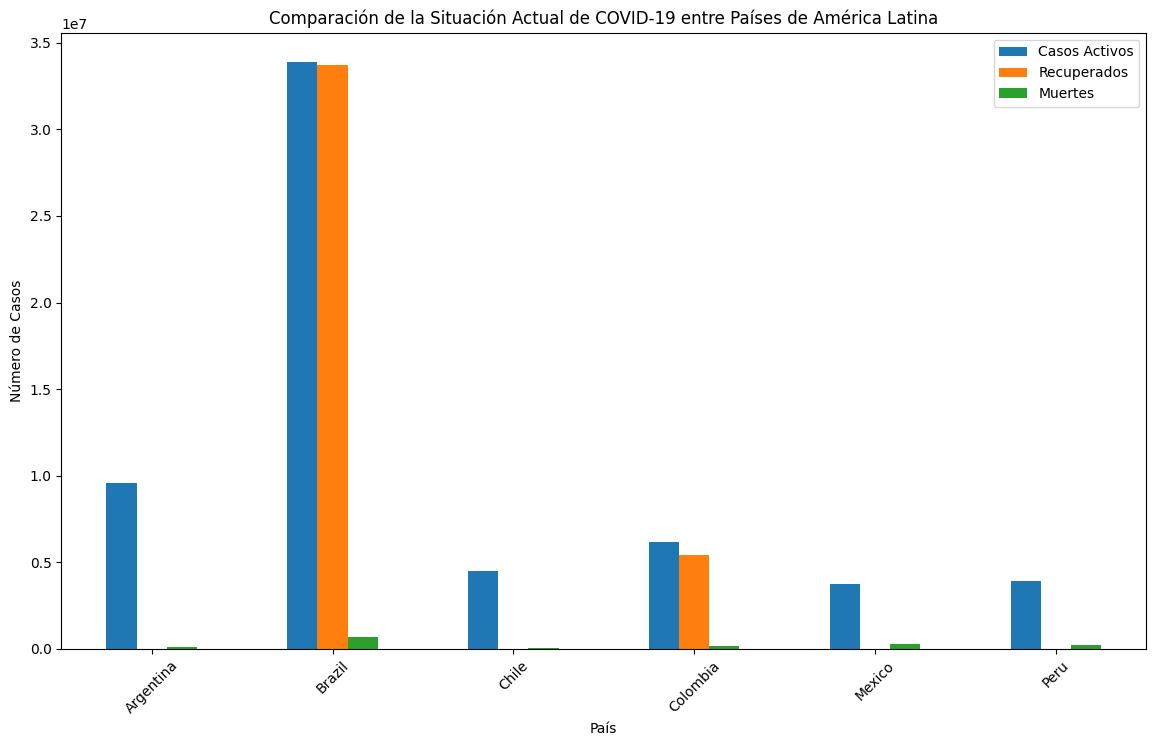

In [36]:
# cálculo de casos activos y gráfico de barras
current_situation = data_final.groupby("country_name").max()[["active_cases", "cumulative_recovered", "cumulative_deceased"]]
current_situation.plot(kind="bar", stacked=False, figsize=(14, 8))
plt.title("Comparación de la Situación Actual de COVID-19 entre Países de América Latina")
plt.xlabel("País")
plt.ylabel("Número de Casos")
plt.legend(["Casos Activos", "Recuperados", "Muertes"])
plt.xticks(rotation=45)
plt.show()

Teniendo en cuenta todos gráficos analizados anteriormente, y de donde se extrajo información valiosa, se considera oportuno expandirse a Brasil, México y Colombia dado que son los países que más casos de COVID-19 y muertes acumularon y al mismo tiempo los que menos dosis de vacunas aplicaron en relación a sus respectivos números de habitantes. 

In [44]:
# se guarda archivo en formato .csv para utilizarlo en power BI 
data_final.to_csv("DatosFinalesPowerBI.csv", index=False)

#### Extra Credit

In [39]:
# mapa para ver la distribución de los casos confirmados, muertes, recuperados y vacunas
# carga de libreria para el mapa
import folium
from folium.plugins import HeatMap

# columnas a utilizar
columns = ["latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", "cumulative_vaccine_doses_administered", "cumulative_recovered"]
data_map = data_final[columns].dropna()

# se crea mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# se crea mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[["latitude", "longitude", "cumulative_confirmed"]], radius=15)
map.add_child(heat_map_confirmed)

# se crea mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[["latitude", "longitude", "cumulative_deceased"]], radius=15)
map.add_child(heat_map_deceased)

# se crea mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[["latitude", "longitude", "cumulative_recovered"]], radius=15)
map.add_child(heat_map_recovered)

# se crea mapa de calor para las vacunas
heat_map_vaccine = HeatMap(data=data_map[["latitude", "longitude", "cumulative_vaccine_doses_administered"]], radius=15)
map.add_child(heat_map_vaccine)

map.save("mapa.html")

map